# Data Analysis and Modeling Setup

In this section, we've set up an environment for data analysis, visualization, and modeling using Python libraries.

## Import Libraries

In [1]:
#for the exploratory data analysis purpose and also for vizualization
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

#for modelling and finding out the correlation in the dataset
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#libraries which are used in the modellling purpose.
import tensorflow as tf

## Load and Combine Raw Data 
# Directory containing the TSV files with raw eye-tracking data

In [ ]:
# Directory containing the TSV files with raw eye-tracking data
directory = "E:\\ce888\\raw_data"

# Create an empty list to store the loaded dataframes
df_list = []

# Get a list of all TSV files in the directory
file_list = glob.glob(directory + '\\*.tsv')

# Load all files into a list of DataFrames
for filepath in file_list:
    df = pd.read_csv(filepath, delimiter='\t', low_memory=False)
    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
df_all = pd.concat(df_list, ignore_index=True)

# Save the combined DataFrame to a CSV file
df_all.to_csv('combined_file.csv', index=False)


#Load dataset and display basic information

In [3]:
data = pd.read_csv('combined_file.csv')

C:\Users\vinit\AppData\Local\Temp\ipykernel_11824\2577377024.py:1: DtypeWarning: Columns (18,19,20,21,22,23,37,38,51,52,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('combined_file.csv')


Data Information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5349398 entries, 0 to 5349397
Data columns (total 96 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Recording timestamp                          int64  
 1   Computer timestamp                           int64  
 2   Sensor                                       object 
 3   Project name                                 object 
 4   Export date                                  object 
 5   Participant name                             object 
 6   Recording name                               object 
 7   Recording date                               object 
 8   Recording date UTC                           object 
 9   Recording start time                         object 
 10  Recording start time UTC                     object 
 11  Recording duration                           int64  
 12  Timeline name                                object 
 13  Recording Fi

In [5]:
data.head()

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Client area position X (DACSpx),Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y
0,0,488673071,NaN,Test group experiment,24.09.2020,Participant0001,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,94804,488767875,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103121,488776192,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,111523,488784594,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,119851,488792922,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording1,24.09.2020,24.09.2020,15:17:34.920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.tail()

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Client area position X (DACSpx),Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y
5349393,65945534,1666203567052,Eye Tracker,Participant0060,20.09.2021,Participant0060,Recording4,20.09.2021,20.09.2021,16:36:55.737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5349394,65953860,1666203575378,Eye Tracker,Participant0060,20.09.2021,Participant0060,Recording4,20.09.2021,20.09.2021,16:36:55.737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5349395,65962157,1666203583675,Eye Tracker,Participant0060,20.09.2021,Participant0060,Recording4,20.09.2021,20.09.2021,16:36:55.737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5349396,65970492,1666203592010,Eye Tracker,Participant0060,20.09.2021,Participant0060,Recording4,20.09.2021,20.09.2021,16:36:55.737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5349397,66131622,1666203753140,NaN,Participant0060,20.09.2021,Participant0060,Recording4,20.09.2021,20.09.2021,16:36:55.737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#view summary statistics of the dataset
data.describe()

,Recording timestamp,Computer timestamp,Recording duration,Recording resolution height,Recording resolution width,Average calibration accuracy (pixels),Average calibration precision SD (pixels),Average calibration precision RMS (pixels),Average validation accuracy (mm),Average validation precision SD (mm),...,Client area position X (DACSpx),Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y
count,5.349398e+06,5.349398e+06,5.349398e+06,5349398.0,5349398.0,26288.000000,26288.00000,26288.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126209.000000,126209.000000
mean,5.364342e+07,6.693636e+11,1.080419e+05,1080.0,1920.0,120.360050,51.68343,87.971888,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-510.324161,795.902495
std,4.274422e+07,9.382488e+11,4.987309e+04,0.0,0.0,96.273493,24.18932,55.635436,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.885882,250.651908
min,0.000000e+00,4.886731e+08,5.359000e+03,1080.0,1920.0,46.000000,33.00000,45.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1755.000000,-118.000000
25%,2.077829e+07,1.597811e+09,6.593900e+04,1080.0,1920.0,46.000000,33.00000,45.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-693.000000,669.000000
50%,4.398393e+07,4.353059e+11,1.005030e+05,1080.0,1920.0,46.000000,33.00000,45.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-496.000000,844.000000
75%,7.482442e+07,1.224226e+12,1.447370e+05,1080.0,1920.0,245.000000,83.00000,160.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-371.000000,980.000000
max,2.333597e+08,4.234414e+12,2.333600e+05,1080.0,1920.0,245.000000,83.00000,160.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1450.000000,1308.000000


In [8]:
#define the shape of the data
data.shape 

(5349398, 96)

In [9]:
data.columns

Index(['Recording timestamp', 'Computer timestamp', 'Sensor', 'Project name',
       'Export date', 'Participant name', 'Recording name', 'Recording date',
       'Recording date UTC', 'Recording start time',
       'Recording start time UTC', 'Recording duration', 'Timeline name',
       'Recording Fixation filter name', 'Recording software version',
       'Recording resolution height', 'Recording resolution width',
       'Recording monitor latency', 'Average calibration accuracy (mm)',
       'Average calibration precision SD (mm)',
       'Average calibration precision RMS (mm)',
       'Average calibration accuracy (degrees)',
       'Average calibration precision SD (degrees)',
       'Average calibration precision RMS (degrees)',
       'Average calibration accuracy (pixels)',
       'Average calibration precision SD (pixels)',
       'Average calibration precision RMS (pixels)',
       'Average validation accuracy (mm)',
       'Average validation precision SD (mm)',
       'A

Data Transformation


In [10]:
data['Pupil diameter right'] = data['Pupil diameter left'].str.replace(',', '.').astype(float)
data['Pupil diameter left'] = data['Pupil diameter left'].str.replace(',', '.').astype(float)
data['Eye position left X (DACSmm)'] = data['Eye position left X (DACSmm)'].str.replace(',', '.').astype(float)
data['Eye position left Y (DACSmm)'] = data['Eye position left Y (DACSmm)'].str.replace(',', '.').astype(float)
data['Eye position left Z (DACSmm)'] = data['Eye position left Z (DACSmm)'].str.replace(',', '.').astype(float)
data['Eye position right X (DACSmm)'] = data['Eye position right X (DACSmm)'].str.replace(',', '.').astype(float)
data['Eye position right Y (DACSmm)'] = data['Eye position right Y (DACSmm)'].str.replace(',', '.').astype(float)
data['Eye position right Z (DACSmm)'] = data['Eye position right Z (DACSmm)'].str.replace(',', '.').astype(float)
data['Gaze point left X (DACSmm)'] = data['Gaze point left X (DACSmm)'].str.replace(',', '.').astype(float)
data['Gaze point left Y (DACSmm)'] = data['Gaze point left Y (DACSmm)'].str.replace(',', '.').astype(float)
data['Gaze point right X (DACSmm)'] = data['Gaze point right X (DACSmm)'].str.replace(',', '.').astype(float)
data['Gaze point right Y (DACSmm)'] = data['Gaze point right Y (DACSmm)'].str.replace(',', '.').astype(float)
data['Gaze point X (MCSnorm)'] = data['Gaze point X (MCSnorm)'].str.replace(',', '.').astype(float)
data['Gaze point Y (MCSnorm)'] = data['Gaze point Y (MCSnorm)'].str.replace(',', '.').astype(float)
data['Gaze point left X (MCSnorm)'] = data['Gaze point left X (MCSnorm)'].str.replace(',', '.').astype(float)
data['Gaze point left Y (MCSnorm)'] = data['Gaze point left Y (MCSnorm)'].str.replace(',', '.').astype(float)
data['Gaze point right X (MCSnorm)'] = data['Gaze point right X (MCSnorm)'].str.replace(',', '.').astype(float)
data['Gaze point right Y (MCSnorm)'] = data['Gaze point right Y (MCSnorm)'].str.replace(',', '.').astype(float)
data['Fixation point X (MCSnorm)'] = data['Fixation point X (MCSnorm)'].str.replace(',', '.').astype(float)
data['Fixation point Y (MCSnorm)'] = data['Fixation point Y (MCSnorm)'].str.replace(',', '.').astype(float)
data['Gaze direction left X'] = data['Gaze direction left X'].str.replace(',', '.').astype(float)
data['Gaze direction left Y'] = data['Gaze direction left Y'].str.replace(',', '.').astype(float)
data['Gaze direction left Z'] = data['Gaze direction left Z'].str.replace(',', '.').astype(float)
data['Gaze direction right X'] = data['Gaze direction right X'].str.replace(',', '.').astype(float)
data['Gaze direction right Y'] = data['Gaze direction right Y'].str.replace(',', '.').astype(float)
data['Gaze direction right Z'] = data['Gaze direction right Z'].str.replace(',', '.').astype(float)

In [11]:
# Convert columns to datetime format with day-first indication
data['Recording date'] = pd.to_datetime(data['Recording date'], dayfirst=True)
data['Export date'] = pd.to_datetime(data['Export date'], dayfirst=True)

In [12]:
format_string = "%Y-%m-%d"
data['Export date'] = pd.to_datetime(data['Export date'], errors='coerce')
data['Recording date'] = pd.to_datetime(data['Export date'], errors='coerce')
data['Recording date UTC'] = pd.to_datetime(data['Recording date UTC'], errors='coerce')
data['Recording start time'] = pd.to_datetime(data['Recording start time'], errors='coerce')
data['Recording start time UTC'] = pd.to_datetime(data['Recording start time UTC'], errors='coerce')

C:\Users\vinit\AppData\Local\Temp\ipykernel_11824\3070353201.py:4: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Recording date UTC'] = pd.to_datetime(data['Recording date UTC'], errors='coerce')
C:\Users\vinit\AppData\Local\Temp\ipykernel_11824\3070353201.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Recording start time'] = pd.to_datetime(data['Recording start time'], errors='coerce')
C:\Users\vinit\AppData\Local\Temp\ipykernel_11824\3070353201.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Recording start time UTC'] = pd.to_datetime(data['Recording start time UTC']

In [13]:
participant_dict = {}
for i in range(1, 61):
    participant_dict[f"Participant{i:04d}"] = i

data["Participant name"] = data["Participant name"].map(participant_dict)

In [14]:
data_csv_score = pd.read_csv("E:\\ce888\\questionnaires\\Questionnaire_datasetIB.csv", encoding='latin1')
data_csv_score = data_csv_score.rename(columns={"Participant nr": "Participant name"})

In [15]:
# Merge the two datasets based on the Participant name column
data = pd.merge(data, data_csv_score[['Participant name', 'Total Score extended']], on='Participant name', how='left')

# Set the timestamp column as the index of the DataFrame
data.set_index("Recording timestamp", inplace=True)

In [16]:
data

,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,Recording start time UTC,...,Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y,Total Score extended
Recording timestamp,,,,,,,,,,,,,,,,,,,,,
0,488673071,NaN,Test group experiment,2020-09-24,1,Recording1,2020-09-24,2020-09-24,2023-08-20 15:17:34,2023-08-20 13:17:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137
94804,488767875,Eye Tracker,Test group experiment,2020-09-24,1,Recording1,2020-09-24,2020-09-24,2023-08-20 15:17:34,2023-08-20 13:17:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137
103121,488776192,Eye Tracker,Test group experiment,2020-09-24,1,Recording1,2020-09-24,2020-09-24,2023-08-20 15:17:34,2023-08-20 13:17:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137
111523,488784594,Eye Tracker,Test group experiment,2020-09-24,1,Recording1,2020-09-24,2020-09-24,2023-08-20 15:17:34,2023-08-20 13:17:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137
119851,488792922,Eye Tracker,Test group experiment,2020-09-24,1,Recording1,2020-09-24,2020-09-24,2023-08-20 15:17:34,2023-08-20 13:17:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65945534,1666203567052,Eye Tracker,Participant0060,2021-09-20,60,Recording4,2021-09-20,2021-09-20,2023-08-20 16:36:55,2023-08-20 14:36:55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80
65953860,1666203575378,Eye Tracker,Participant0060,2021-09-20,60,Recording4,2021-09-20,2021-09-20,2023-08-20 16:36:55,2023-08-20 14:36:55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80
65962157,1666203583675,Eye Tracker,Participant0060,2021-09-20,60,Recording4,2021-09-20,2021-09-20,2023-08-20 16:36:55,2023-08-20 14:36:55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80


In [17]:
data.to_csv("tsv_data_with_score.csv", index=False)

print("CSV file 'tsv_data_with_score.csv' saved successfully.")


CSV file 'tsv_data_with_score.csv' saved successfully.


# Working on EYETzip

In [12]:
# Get a list of all the .csv files in the folder 
filenames = glob.glob("E:\ce888\EYET\*.csv")

Experiment_count = len(filenames) 
print ("eye-gaze trajectories : ", Experiment_count)

eye-gaze trajectories :  502


In [17]:
#read and merged csv file
path = "E:\ce888\EYET" 
all_files = os.listdir(path)

df_list = [] 
for filename in all_files:
    if filename.endswith(".csv"):
        file_path = os.path.join(path, filename)
        df = pd.read_csv(file_path)
        df_list.append(df)
df = pd.concat(df_list)

C:\Users\vinit\AppData\Local\Temp\ipykernel_16348\1289339879.py:9: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\vinit\AppData\Local\Temp\ipykernel_16348\1289339879.py:9: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\vinit\AppData\Local\Temp\ipykernel_16348\1289339879.py:9: DtypeWarning: Columns (67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\vinit\AppData\Local\Temp\ipykernel_16348\1289339879.py:9: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\vinit\AppData\Local\Temp\ipykernel_16348\1289339879.py:9: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_p

#Saving and Loading Data

In [18]:
# Save the merged DataFrame to a CSV file
df.to_csv("merged_eyetzip_data.csv", index=False)

In [19]:
# Read the CSV file
main_csv = pd.read_csv("E:\\ce888\\merged_eyetzip_data.csv")

C:\Users\vinit\AppData\Local\Temp\ipykernel_16348\3777526591.py:2: DtypeWarning: Columns (20,21,34,35,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  main_csv = pd.read_csv("E:\\ce888\\merged_eyetzip_data.csv")


In [20]:
main_csv

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,3082,23419315,512092386,NaN,Test group experiment,24.09.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,NaN,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
1,3083,23419315,512092386,NaN,Test group experiment,24.09.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,NaN,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
2,3084,23426120,512099191,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
3,3085,23434449,512107520,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
4,3086,23442782,512115853,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4844299,31731,65940337,1666203561855,NaN,Participant0060,20.09.2021,Participant0060,Recording4,20.09.2021,20.09.2021,...,NaN,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN
4844300,31732,65945534,1666203567052,Eye Tracker,Participant0060,20.09.2021,Participant0060,Recording4,20.09.2021,20.09.2021,...,NaN,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN
4844301,31733,65953860,1666203575378,Eye Tracker,Participant0060,20.09.2021,Participant0060,Recording4,20.09.2021,20.09.2021,...,NaN,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN
4844302,31734,65962157,1666203583675,Eye Tracker,Participant0060,20.09.2021,Participant0060,Recording4,20.09.2021,20.09.2021,...,NaN,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN


#Convert string numbers with comma as decimal separator to float.
As most features  data type is string we need to convert it to float and change , to . due to which it is interpreted as object

In [21]:
main_csv['Pupil diameter right'] = main_csv['Pupil diameter left'].str.replace(',', '.').astype(float)
main_csv['Pupil diameter left'] = main_csv['Pupil diameter left'].str.replace(',', '.').astype(float)
main_csv['Eye position left X (DACSmm)'] = main_csv['Eye position left X (DACSmm)'].str.replace(',', '.').astype(float)
main_csv['Eye position left Y (DACSmm)'] = main_csv['Eye position left Y (DACSmm)'].str.replace(',', '.').astype(float)
main_csv['Eye position left Z (DACSmm)'] = main_csv['Eye position left Z (DACSmm)'].str.replace(',', '.').astype(float)
main_csv['Eye position right X (DACSmm)'] = main_csv['Eye position right X (DACSmm)'].str.replace(',', '.').astype(float)
main_csv['Eye position right Y (DACSmm)'] = main_csv['Eye position right Y (DACSmm)'].str.replace(',', '.').astype(float)
main_csv['Eye position right Z (DACSmm)'] = main_csv['Eye position right Z (DACSmm)'].str.replace(',', '.').astype(float)
main_csv['Gaze point left X (DACSmm)'] = main_csv['Gaze point left X (DACSmm)'].str.replace(',', '.').astype(float)
main_csv['Gaze point left Y (DACSmm)'] = main_csv['Gaze point left Y (DACSmm)'].str.replace(',', '.').astype(float)
main_csv['Gaze point right X (DACSmm)'] = main_csv['Gaze point right X (DACSmm)'].str.replace(',', '.').astype(float)
main_csv['Gaze point right Y (DACSmm)'] = main_csv['Gaze point right Y (DACSmm)'].str.replace(',', '.').astype(float)
main_csv['Gaze point X (MCSnorm)'] = main_csv['Gaze point X (MCSnorm)'].str.replace(',', '.').astype(float)
main_csv['Gaze point Y (MCSnorm)'] = main_csv['Gaze point Y (MCSnorm)'].str.replace(',', '.').astype(float)
main_csv['Gaze point left X (MCSnorm)'] = main_csv['Gaze point left X (MCSnorm)'].str.replace(',', '.').astype(float)
main_csv['Gaze point left Y (MCSnorm)'] = main_csv['Gaze point left Y (MCSnorm)'].str.replace(',', '.').astype(float)
main_csv['Gaze point right X (MCSnorm)'] = main_csv['Gaze point right X (MCSnorm)'].str.replace(',', '.').astype(float)
main_csv['Gaze point right Y (MCSnorm)'] = main_csv['Gaze point right Y (MCSnorm)'].str.replace(',', '.').astype(float)
main_csv['Fixation point X (MCSnorm)'] = main_csv['Fixation point X (MCSnorm)'].str.replace(',', '.').astype(float)
main_csv['Fixation point Y (MCSnorm)'] = main_csv['Fixation point Y (MCSnorm)'].str.replace(',', '.').astype(float)
main_csv['Gaze direction left X'] = main_csv['Gaze direction left X'].str.replace(',', '.').astype(float)
main_csv['Gaze direction left Y'] = main_csv['Gaze direction left Y'].str.replace(',', '.').astype(float)
main_csv['Gaze direction left Z'] = main_csv['Gaze direction left Z'].str.replace(',', '.').astype(float)
main_csv['Gaze direction right X'] = main_csv['Gaze direction right X'].str.replace(',', '.').astype(float)
main_csv['Gaze direction right Y'] = main_csv['Gaze direction right Y'].str.replace(',', '.').astype(float)
main_csv['Gaze direction right Z'] = main_csv['Gaze direction right Z'].str.replace(',', '.').astype(float)

#Date Parsing : Preprocessing to ensure that the date and time variables are in a consistent and machine-readable format

In [22]:
format_string = "%Y-%m-%d"
main_csv['Export date'] = pd.to_datetime(main_csv['Export date'], errors='coerce')
main_csv['Recording date'] = pd.to_datetime(main_csv['Export date'], errors='coerce')
main_csv['Recording date UTC'] = pd.to_datetime(main_csv['Recording date UTC'], errors='coerce')
main_csv['Recording start time'] = pd.to_datetime(main_csv['Recording start time'], errors='coerce')
main_csv['Recording start time UTC'] = pd.to_datetime(main_csv['Recording start time UTC'], errors='coerce')

C:\Users\vinit\AppData\Local\Temp\ipykernel_16348\1481008330.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  main_csv['Export date'] = pd.to_datetime(main_csv['Export date'], errors='coerce')
C:\Users\vinit\AppData\Local\Temp\ipykernel_16348\1481008330.py:4: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  main_csv['Recording date UTC'] = pd.to_datetime(main_csv['Recording date UTC'], errors='coerce')
C:\Users\vinit\AppData\Local\Temp\ipykernel_16348\1481008330.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  main_csv['Recording start time'] = pd.to_datetime(main_csv['Recording start time'], errors='coerce')
C:\Use

#Coverting participant name from Participant0001 to 1 

In [23]:
participant_dict = {}
for i in range(1, 61):
    participant_dict[f"Participant{i:04d}"] = i

main_csv["Participant name"] = main_csv["Participant name"].map(participant_dict)

Load Questinonnaire File

In [24]:
main_csv_score = pd.read_csv("E:\\ce888\\questionnaires\\Questionnaire_datasetIB.csv", encoding='latin1')
main_csv_score = main_csv_score.rename(columns={"Participant nr": "Participant name"})

In [25]:
# Merge the two datasets based on the Participant name column
main_csv = pd.merge(main_csv, main_csv_score[['Participant name', 'Total Score extended']], on='Participant name', how='left')

# Set the timestamp column as the index of the DataFrame
main_csv.set_index("Recording timestamp", inplace=True)

In [26]:
main_csv

,Unnamed: 0,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y,Total Score extended
Recording timestamp,,,,,,,,,,,,,,,,,,,,,
23419315,3082,512092386,NaN,Test group experiment,2020-09-24,1,Recording1,2020-09-24,2020-09-24,2023-08-20 15:17:34.920,...,Fixation,117.0,64.0,971.0,341.0,0.5073,0.316,NaN,NaN,137
23419315,3083,512092386,NaN,Test group experiment,2020-09-24,1,Recording1,2020-09-24,2020-09-24,2023-08-20 15:17:34.920,...,Fixation,117.0,64.0,971.0,341.0,0.5073,0.316,NaN,NaN,137
23426120,3084,512099191,Eye Tracker,Test group experiment,2020-09-24,1,Recording1,2020-09-24,2020-09-24,2023-08-20 15:17:34.920,...,Fixation,117.0,64.0,971.0,341.0,0.5073,0.316,NaN,NaN,137
23434449,3085,512107520,Eye Tracker,Test group experiment,2020-09-24,1,Recording1,2020-09-24,2020-09-24,2023-08-20 15:17:34.920,...,Fixation,117.0,64.0,971.0,341.0,0.5073,0.316,NaN,NaN,137
23442782,3086,512115853,Eye Tracker,Test group experiment,2020-09-24,1,Recording1,2020-09-24,2020-09-24,2023-08-20 15:17:34.920,...,Fixation,117.0,64.0,971.0,341.0,0.5073,0.316,NaN,NaN,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65940337,31731,1666203561855,NaN,Participant0060,2021-09-20,60,Recording4,2021-09-20,2021-09-20,2023-08-20 16:36:55.000,...,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN,80
65945534,31732,1666203567052,Eye Tracker,Participant0060,2021-09-20,60,Recording4,2021-09-20,2021-09-20,2023-08-20 16:36:55.000,...,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN,80
65953860,31733,1666203575378,Eye Tracker,Participant0060,2021-09-20,60,Recording4,2021-09-20,2021-09-20,2023-08-20 16:36:55.000,...,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN,80


Save the main_csv DataFrame to a new CSV file named "final_data.csv"

In [27]:
main_csv.to_csv("eyetzip_data_with_score.csv", index=False)

print("CSV file 'eyetzip_data_with_score.csv' saved successfully.")


CSV file 'eyetzip_data_with_score.csv' saved successfully.


#  Data Analysis
# Column of interest

In [ ]:
def analyze_gaze_duration(data):
    """Analyze the 'Gaze event duration' column."""
    # Check for missing values
    missing_values = data['Gaze event duration'].isnull().sum()
    print(f"Missing values in 'Gaze event duration': {missing_values}")
    
    # Display the first few entries
    print("\nFirst few entries of 'Gaze event duration':")
    print(df['Gaze event duration'].head())
    
    # Calculate the average gaze duration per eye movement type
    avg_gaze_duration = data.groupby('Eye movement type')['Gaze event duration'].mean()
    print("\nAverage 'Gaze event duration' per 'Eye movement type':")
    print(avg_gaze_duration)

analyze_gaze_duration(data)


Missing values in 'Gaze event duration': 3097

First few entries of 'Gaze event duration':
0    117.0
1    117.0
2    117.0
3    117.0
4    117.0
Name: Gaze event duration, dtype: float64

Average 'Gaze event duration' per 'Eye movement type':
Eye movement type
EyesNotFound    906.880347
Fixation        342.134201
Saccade          42.772406
Unclassified     24.519334
Name: Gaze event duration, dtype: float64


In [39]:
data.columns

Index(['Computer timestamp', 'Sensor', 'Project name', 'Export date',
       'Participant name', 'Recording name', 'Recording date',
       'Recording date UTC', 'Recording start time',
       'Recording start time UTC', 'Recording duration', 'Timeline name',
       'Recording Fixation filter name', 'Recording software version',
       'Recording resolution height', 'Recording resolution width',
       'Recording monitor latency', 'Average calibration accuracy (mm)',
       'Average calibration precision SD (mm)',
       'Average calibration precision RMS (mm)',
       'Average calibration accuracy (degrees)',
       'Average calibration precision SD (degrees)',
       'Average calibration precision RMS (degrees)',
       'Average calibration accuracy (pixels)',
       'Average calibration precision SD (pixels)',
       'Average calibration precision RMS (pixels)',
       'Average validation accuracy (mm)',
       'Average validation precision SD (mm)',
       'Average validation preci

In [55]:
import datetime
data['Recording date']=pd.to_datetime(data['Recording date'])
data['Recording start time']=pd.to_datetime(data['Recording start time'])
data['Total Score extended']=data['Total Score extended'].astype(int)
data

,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,Recording start time UTC,...,Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y,Total Score extended
Recording timestamp,,,,,,,,,,,,,,,,,,,,,
0,488673071,NaN,Test group experiment,2020-09-24,1,Recording1,2020-09-24,2020-09-24,2023-08-20 15:17:34,2023-08-20 13:17:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137
94804,488767875,Eye Tracker,Test group experiment,2020-09-24,1,Recording1,2020-09-24,2020-09-24,2023-08-20 15:17:34,2023-08-20 13:17:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137
103121,488776192,Eye Tracker,Test group experiment,2020-09-24,1,Recording1,2020-09-24,2020-09-24,2023-08-20 15:17:34,2023-08-20 13:17:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137
111523,488784594,Eye Tracker,Test group experiment,2020-09-24,1,Recording1,2020-09-24,2020-09-24,2023-08-20 15:17:34,2023-08-20 13:17:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137
119851,488792922,Eye Tracker,Test group experiment,2020-09-24,1,Recording1,2020-09-24,2020-09-24,2023-08-20 15:17:34,2023-08-20 13:17:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65945534,1666203567052,Eye Tracker,Participant0060,2021-09-20,60,Recording4,2021-09-20,2021-09-20,2023-08-20 16:36:55,2023-08-20 14:36:55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80
65953860,1666203575378,Eye Tracker,Participant0060,2021-09-20,60,Recording4,2021-09-20,2021-09-20,2023-08-20 16:36:55,2023-08-20 14:36:55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80
65962157,1666203583675,Eye Tracker,Participant0060,2021-09-20,60,Recording4,2021-09-20,2021-09-20,2023-08-20 16:36:55,2023-08-20 14:36:55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80


# Performing visual Exploratory data analysis on Row Data

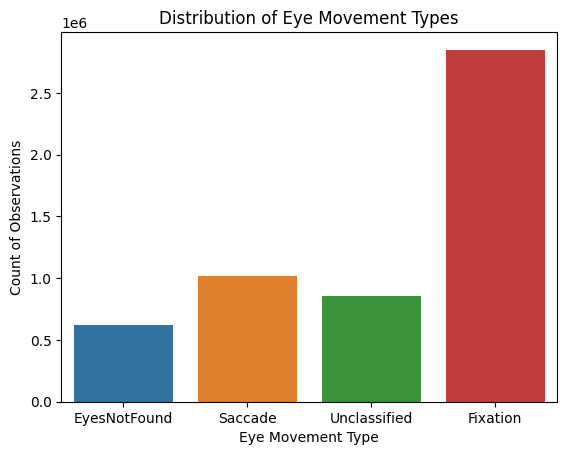

In [56]:
sns.countplot(x='Eye movement type', data=data)
plt.title("Distribution of Eye Movement Types")
plt.xlabel("Eye Movement Type")
plt.ylabel("Count of Observations")

# Display plot
plt.show()


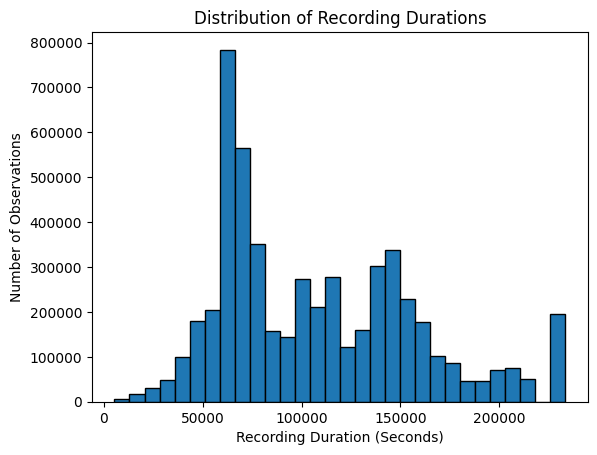

In [57]:
plt.hist(data['Recording duration'], bins=30, edgecolor='black')
plt.xlabel('Recording Duration (Seconds)')
plt.ylabel('Number of Observations')
plt.title('Distribution of Recording Durations')

plt.show()


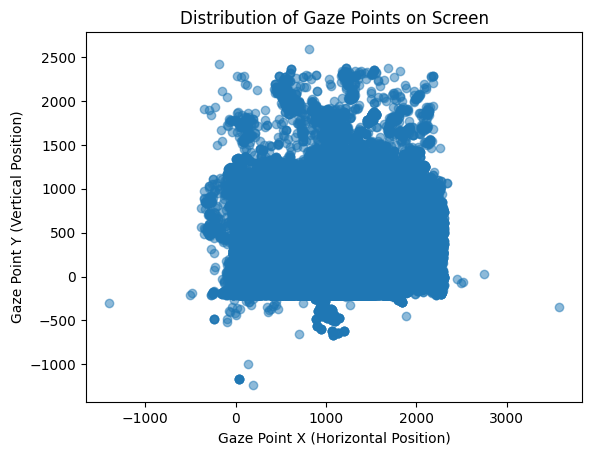

In [58]:
# Scatter plot to visualize the distribution of gaze points on the screen
plt.scatter(data['Gaze point X'], data['Gaze point Y'], alpha=0.5)
plt.xlabel('Gaze Point X (Horizontal Position)')
plt.ylabel('Gaze Point Y (Vertical Position)')
plt.title('Distribution of Gaze Points on Screen')

plt.show()

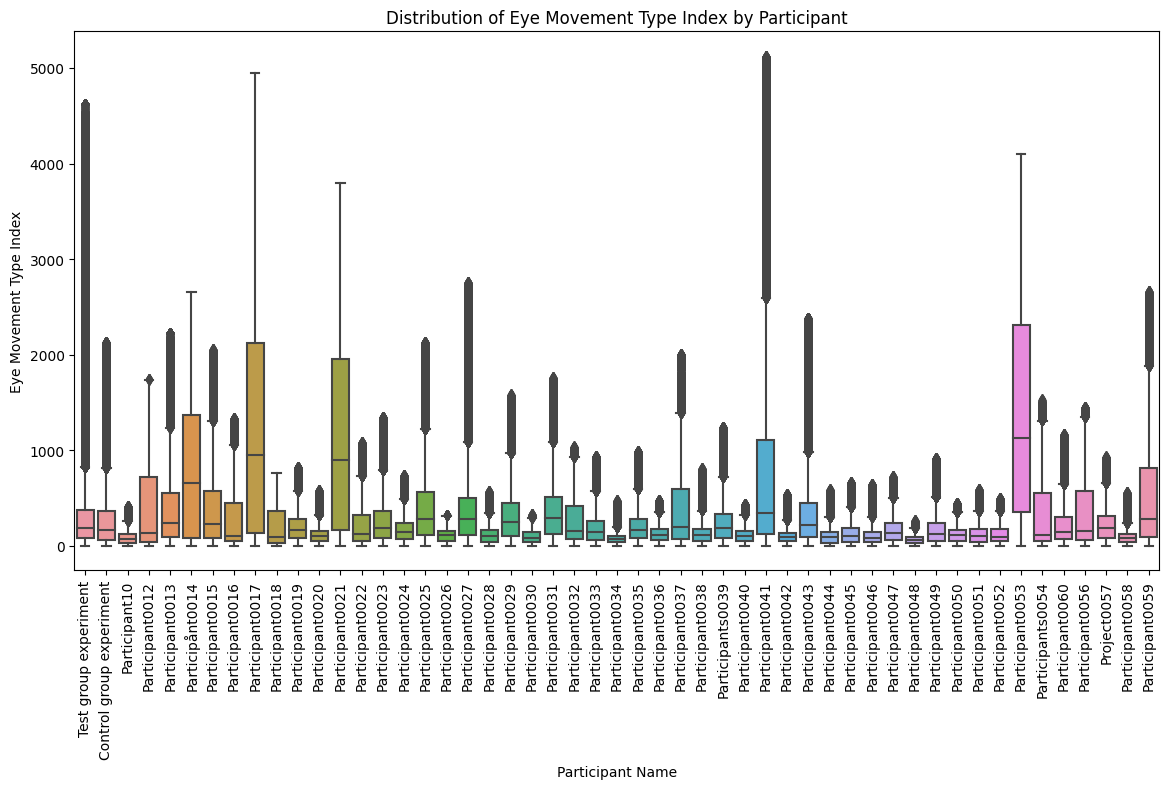

In [60]:
plt.figure(figsize=(14, 7))
sns.boxplot(x=data['Project name'], y=data['Eye movement type index'])
plt.xlabel('Participant Name')
plt.ylabel('Eye Movement Type Index')
plt.title('Distribution of Eye Movement Type Index by Participant')
plt.xticks(rotation=90)

plt.show()

<Axes: xlabel='Total Score extended'>

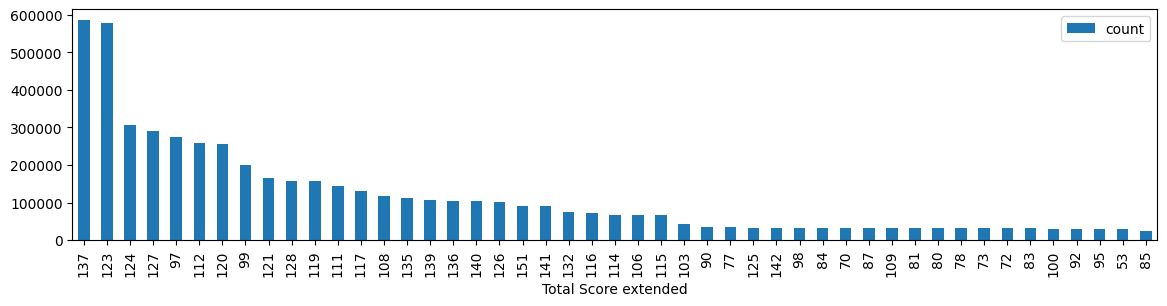

In [62]:
pd.DataFrame(data['Total Score extended'].value_counts()).plot(kind="bar", figsize=(14,3))   

# Correlation Matrix for Row Data

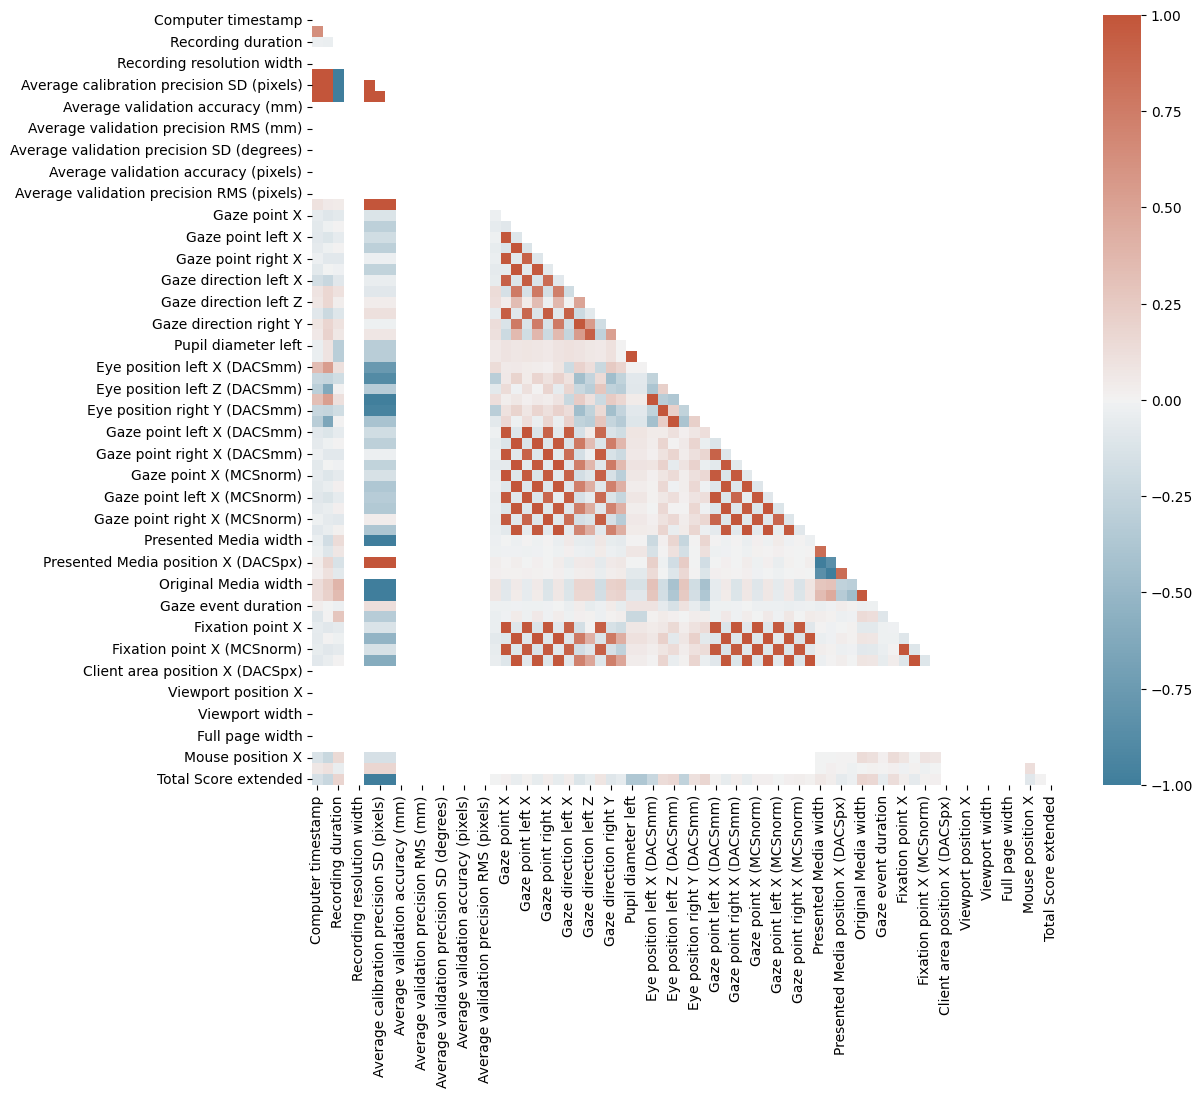

In [36]:
# Filter only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute correlation on numeric columns
corr_matrix = numeric_data.corr()

f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap=cmap)
plt.show()


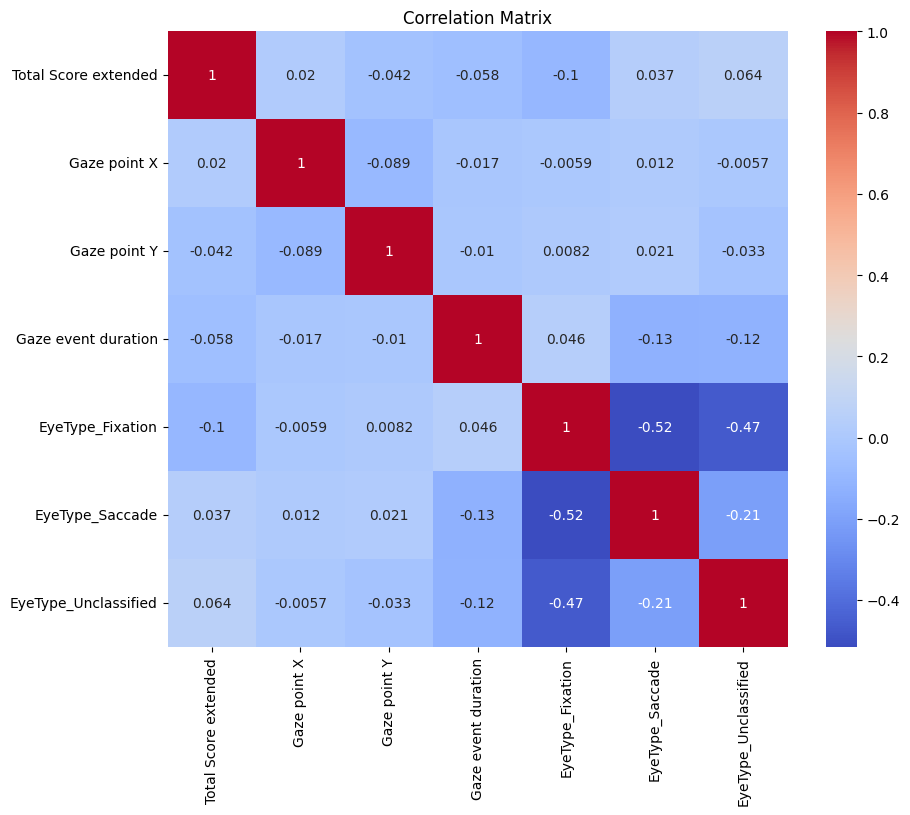

In [ ]:
# Select relevant columns
selected_columns = ['Project name','Total Score extended', 'Gaze point X', 'Gaze point Y', 'Gaze event duration']


# Subset the DataFrame
subset_df = data[selected_columns]

# Correlation analysis
correlation_matrix = one_hot_encoded.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [45]:
#making a copy of cleaned data that will be use further for the analysis purpose
new_data_a = data.copy()

#  Differentiate into two groups based on project names

In [ ]:
# Count occurrences of each project name in the 'Project Name' column
project_counts = data['Project name'].value_counts()
# Print the counts for "Control group experiment" and "Test group experiment"
print(f'Control group experiment: {project_counts.get("Control group experiment", 0)}')
print(f'Test group experiment: {project_counts.get("Test group experiment", 0)}')

Control group experiment: 396442
Test group experiment: 1820161


In [ ]:
# Separate data based on project name
control_group_data = data[data['Project name'] == 'Control group experiment']
test_group_data = data[data['Project name'] == 'Test group experiment']

# Save the separated data to CSV files
control_group_data.to_csv('control_group_data.csv', index=False)
test_group_data.to_csv('test_group_data.csv', index=False)

# Print some summary statistics for each group
print("Control Group Summary:")
print(control_group_data.describe())

print("\nTest Group Summary:")
print(test_group_data.describe())


Control Group Summary:
       Computer timestamp                    Export date  Participant name  \
count        3.964420e+05                         396442     396442.000000   
mean         4.533753e+11  2020-10-10 21:48:22.778212352          3.756393   
min          9.858521e+09            2020-09-30 00:00:00          2.000000   
25%          4.353781e+11            2020-10-06 00:00:00          2.000000   
50%          5.151157e+11            2020-10-07 00:00:00          4.000000   
75%          5.156752e+11            2020-10-20 00:00:00          6.000000   
max          5.207993e+11            2020-10-20 00:00:00          8.000000   
std          1.376953e+11                            NaN          1.967851   

                      Recording date             Recording date UTC  \
count                         396442                         396442   
mean   2020-10-10 21:48:22.778212352  2020-10-04 12:30:25.235469568   
min              2020-09-30 00:00:00            2020-09-30 00

C:\Users\vinit\AppData\Local\Temp\ipykernel_11824\294758414.py:3: DtypeWarning: Columns (17,18,19,20,21,22,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  test_group_data = pd.read_csv('test_group_data.csv')


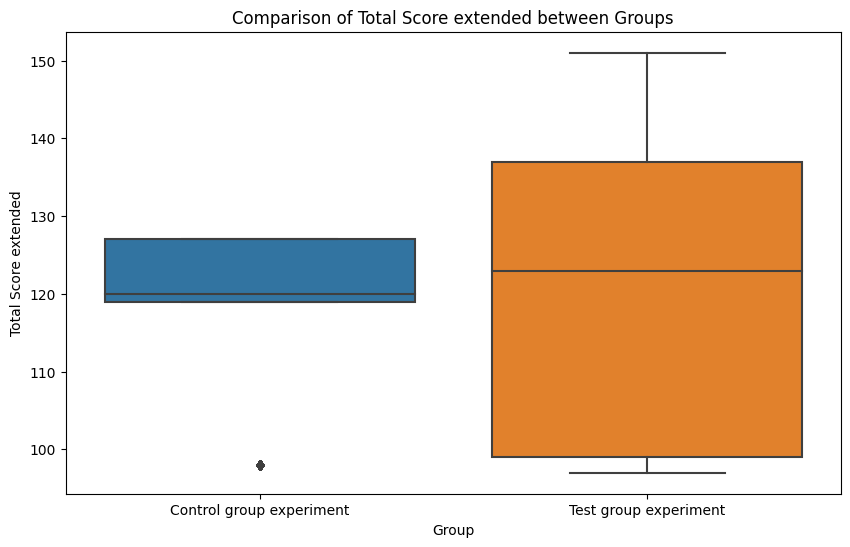

In [130]:
# Load the separated data
control_group_data = pd.read_csv('control_group_data.csv')
test_group_data = pd.read_csv('test_group_data.csv')

# Compare the distributions of 'Total Score extended' between the two groups using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Project name', y='Total Score extended', data=pd.concat([control_group_data, test_group_data]))
plt.xlabel('Group')
plt.ylabel('Total Score extended')
plt.title('Comparison of Total Score extended between Groups')
plt.show()

In [131]:
control_group_data

,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,Recording start time UTC,...,Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y,Total Score extended
0,514974084171,NaN,Control group experiment,2020-09-30,2,Recording1,2020-09-30,2020-09-30,2023-08-20 14:51:08,2023-08-20 12:51:08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127
1,514974210695,Eye Tracker,Control group experiment,2020-09-30,2,Recording1,2020-09-30,2020-09-30,2023-08-20 14:51:08,2023-08-20 12:51:08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127
2,514974219002,Eye Tracker,Control group experiment,2020-09-30,2,Recording1,2020-09-30,2020-09-30,2023-08-20 14:51:08,2023-08-20 12:51:08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127
3,514974227304,Eye Tracker,Control group experiment,2020-09-30,2,Recording1,2020-09-30,2020-09-30,2023-08-20 14:51:08,2023-08-20 12:51:08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127
4,514974235671,Eye Tracker,Control group experiment,2020-09-30,2,Recording1,2020-09-30,2020-09-30,2023-08-20 14:51:08,2023-08-20 12:51:08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396437,10238313997,Eye Tracker,Control group experiment,2020-10-20,8,Recording17,2020-10-20,2020-10-20,2023-08-20 14:47:43,2023-08-20 12:47:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98
396438,10238322356,Eye Tracker,Control group experiment,2020-10-20,8,Recording17,2020-10-20,2020-10-20,2023-08-20 14:47:43,2023-08-20 12:47:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98
396439,10238330695,Eye Tracker,Control group experiment,2020-10-20,8,Recording17,2020-10-20,2020-10-20,2023-08-20 14:47:43,2023-08-20 12:47:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98
396440,10238338992,Eye Tracker,Control group experiment,2020-10-20,8,Recording17,2020-10-20,2020-10-20,2023-08-20 14:47:43,2023-08-20 12:47:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98


In [132]:
test_group_data

,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,Recording start time UTC,...,Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y,Total Score extended
0,488673071,NaN,Test group experiment,2020-09-24,1,Recording1,2020-09-24,2020-09-24,2023-08-20 15:17:34,2023-08-20 13:17:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137
1,488767875,Eye Tracker,Test group experiment,2020-09-24,1,Recording1,2020-09-24,2020-09-24,2023-08-20 15:17:34,2023-08-20 13:17:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137
2,488776192,Eye Tracker,Test group experiment,2020-09-24,1,Recording1,2020-09-24,2020-09-24,2023-08-20 15:17:34,2023-08-20 13:17:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137
3,488784594,Eye Tracker,Test group experiment,2020-09-24,1,Recording1,2020-09-24,2020-09-24,2023-08-20 15:17:34,2023-08-20 13:17:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137
4,488792922,Eye Tracker,Test group experiment,2020-09-24,1,Recording1,2020-09-24,2020-09-24,2023-08-20 15:17:34,2023-08-20 13:17:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820156,1485838444,Eye Tracker,Test group experiment,2020-10-29,11,Recording49,2020-10-29,2020-10-29,2023-08-20 14:51:45,2023-08-20 13:51:45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151
1820157,1485861068,NaN,Test group experiment,2020-10-29,11,Recording49,2020-10-29,2020-10-29,2023-08-20 14:51:45,2023-08-20 13:51:45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151
1820158,1485861068,Mouse,Test group experiment,2020-10-29,11,Recording49,2020-10-29,2020-10-29,2023-08-20 14:51:45,2023-08-20 13:51:45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-206.0,1014.0,151
1820159,1485895856,NaN,Test group experiment,2020-10-29,11,Recording49,2020-10-29,2020-10-29,2023-08-20 14:51:45,2023-08-20 13:51:45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151


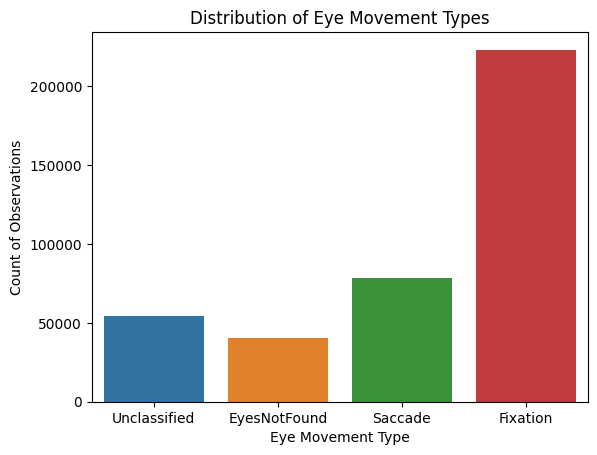

In [133]:
sns.countplot(x='Eye movement type', data=control_group_data)
plt.title("Distribution of Eye Movement Types")
plt.xlabel("Eye Movement Type")
plt.ylabel("Count of Observations")

# Display plot
plt.show()


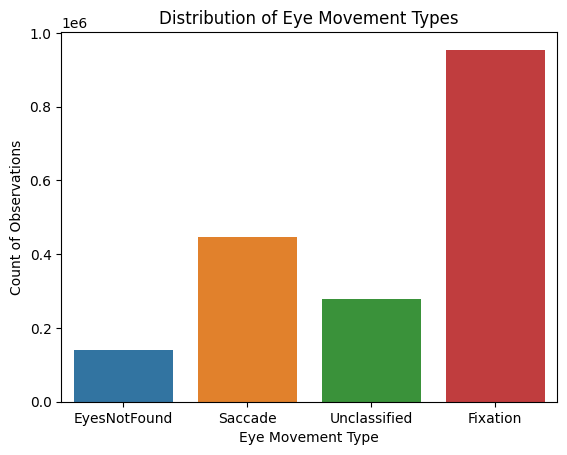

In [134]:
sns.countplot(x='Eye movement type', data=test_group_data)
plt.title("Distribution of Eye Movement Types")
plt.xlabel("Eye Movement Type")
plt.ylabel("Count of Observations")

# Display plot
plt.show()


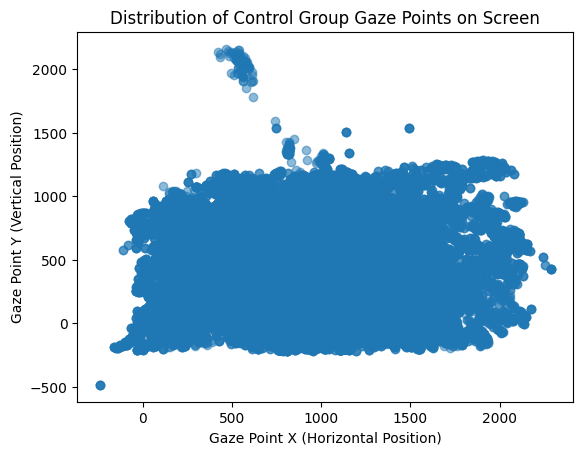

In [ ]:
# Scatter plot to visualize the distribution of gaze points on the screen
plt.scatter(control_group_data['Gaze point X'], control_group_data['Gaze point Y'], alpha=0.5)
plt.xlabel('Gaze Point X (Horizontal Position)')
plt.ylabel('Gaze Point Y (Vertical Position)')
plt.title('Distribution of Control Group Gaze Points on Screen')

plt.show()

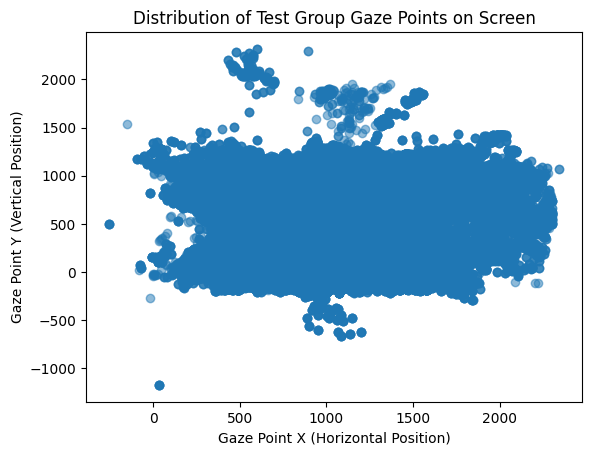

In [ ]:
# Scatter plot to visualize the distribution of gaze points on the screen
plt.scatter(test_group_data['Gaze point X'], test_group_data['Gaze point Y'], alpha=0.5)
plt.xlabel('Gaze Point X (Horizontal Position)')
plt.ylabel('Gaze Point Y (Vertical Position)')
plt.title('Distribution of Test Group Gaze Points on Screen')

plt.show()

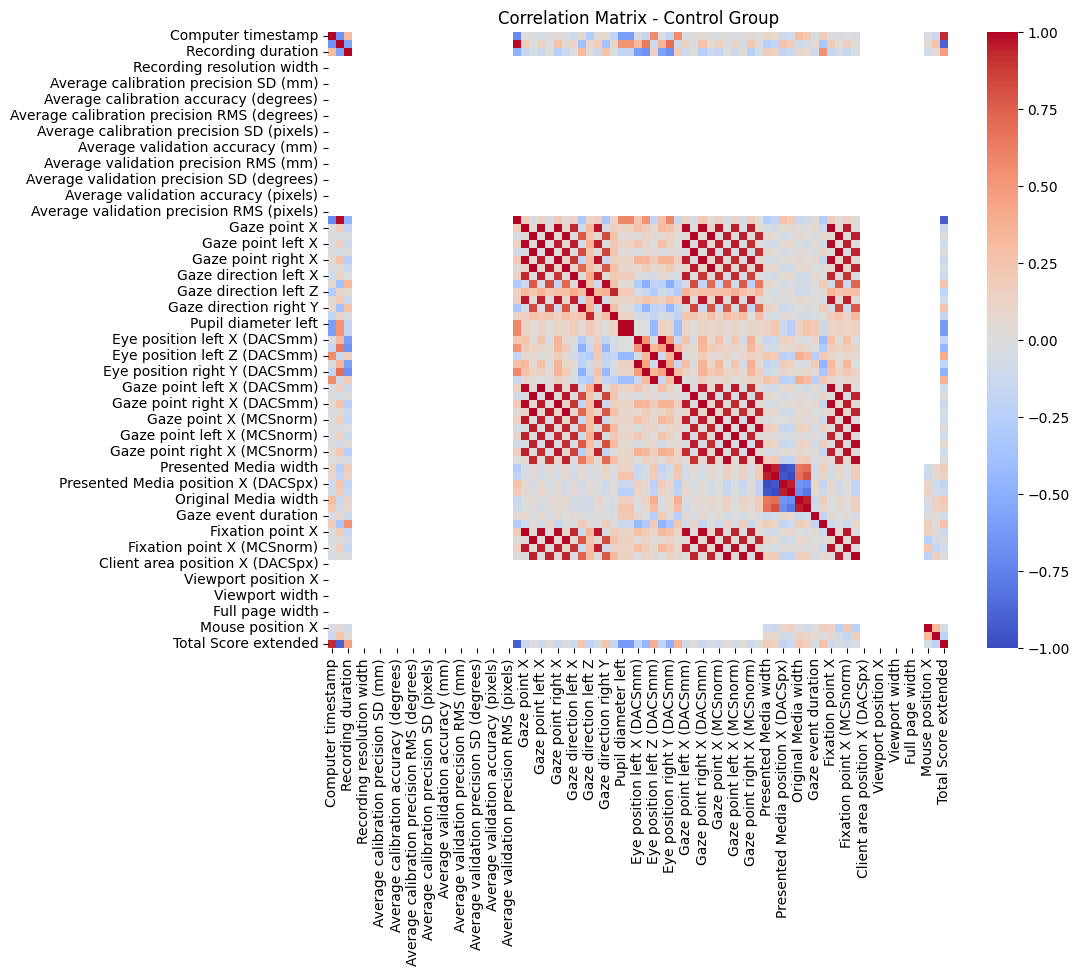

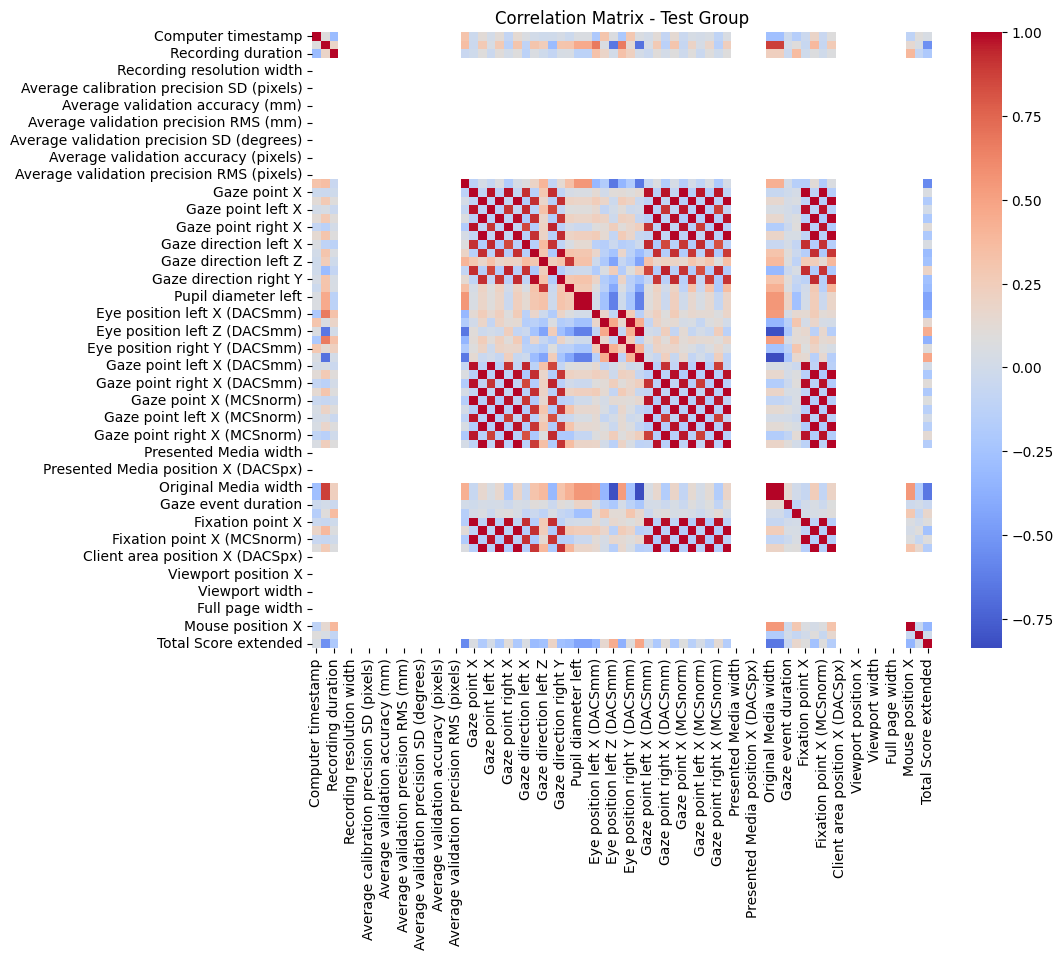

In [ ]:
# Select only numeric columns for the correlation matrix
numeric_columns = control_group_data.select_dtypes(include=[np.number])
control_corr_matrix = numeric_columns.corr()

# Visualize the correlation matrix for the control group
plt.figure(figsize=(10, 8))
sns.heatmap(control_corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix - Control Group')
plt.show()

# Repeat the same for the test group
numeric_columns_test = test_group_data.select_dtypes(include=[np.number])
test_corr_matrix = numeric_columns_test.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(test_corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix - Test Group')
plt.show()


In [135]:
# Get list of numeric column names from control group data
control_numeric_columns = control_group_data.select_dtypes(include=[np.number]).columns.tolist()

# Get list of numeric column names from test group data
test_numeric_columns = test_group_data.select_dtypes(include=[np.number]).columns.tolist()


In [136]:
control_group_column_names = control_group_data.columns.tolist()
control_group_column_names

['Computer timestamp',
 'Sensor',
 'Project name',
 'Export date',
 'Participant name',
 'Recording name',
 'Recording date',
 'Recording date UTC',
 'Recording start time',
 'Recording start time UTC',
 'Recording duration',
 'Timeline name',
 'Recording Fixation filter name',
 'Recording software version',
 'Recording resolution height',
 'Recording resolution width',
 'Recording monitor latency',
 'Average calibration accuracy (mm)',
 'Average calibration precision SD (mm)',
 'Average calibration precision RMS (mm)',
 'Average calibration accuracy (degrees)',
 'Average calibration precision SD (degrees)',
 'Average calibration precision RMS (degrees)',
 'Average calibration accuracy (pixels)',
 'Average calibration precision SD (pixels)',
 'Average calibration precision RMS (pixels)',
 'Average validation accuracy (mm)',
 'Average validation precision SD (mm)',
 'Average validation precision RMS (mm)',
 'Average validation accuracy (degrees)',
 'Average validation precision SD (degr

#  Machine Learning 
#Model Building

In [2]:
import pandas as pd


control_group_data = pd.read_csv('control_group_data.csv')
test_group_data = pd.read_csv('test_group_data.csv')

# Select relevant columns for control group
control_selected_columns = ['Participant name', 'Recording duration',
                             'Pupil diameter left', 'Pupil diameter right',
                             'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)',
                             'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)',
                             'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y',
                             'Gaze event duration', 'Fixation point X', 'Fixation point Y', 'Total Score extended', 'Gaze point X', 'Gaze point Y', 'Gaze event duration']

# Create a DataFrame with selected columns for control group
control_group_selected = control_group_data[control_selected_columns]

# Select relevant columns for test group
test_selected_columns = ['Participant name', 'Recording duration',
                         'Pupil diameter left', 'Pupil diameter right',
                         'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)',
                         'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)',
                         'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y',
                         'Gaze event duration', 'Fixation point X', 'Fixation point Y', 'Total Score extended', 'Gaze point X', 'Gaze point Y', 'Gaze event duration']

# Create a DataFrame with selected columns for test group
test_group_selected = test_group_data[test_selected_columns]

C:\Users\vinit\AppData\Local\Temp\ipykernel_10364\253367038.py:5: DtypeWarning: Columns (17,18,19,20,21,22,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  test_group_data = pd.read_csv('test_group_data.csv')


In [3]:
# Replace NaN values with 0 in control group dataframe
control_group_selected.fillna(0, inplace=True)

# Replace NaN values with 0 in test group dataframe
test_group_selected.fillna(0, inplace=True)

C:\Users\vinit\AppData\Local\Temp\ipykernel_10364\3346336910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_group_selected.fillna(0, inplace=True)
C:\Users\vinit\AppData\Local\Temp\ipykernel_10364\3346336910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_group_selected.fillna(0, inplace=True)


In [4]:
# Feature Engineering
# Calculate Eye Movement Ratios for X, Y, and Z
control_group_selected['Eye_Position_Ratio_X'] = control_group_selected['Eye position left X (DACSmm)'] / (control_group_selected['Eye position right X (DACSmm)'] + 1e-6)
test_group_selected['Eye_Position_Ratio_X'] = test_group_selected['Eye position left X (DACSmm)'] / (test_group_selected['Eye position right X (DACSmm)'] + 1e-6)

control_group_selected['Eye_Position_Ratio_Y'] = control_group_selected['Eye position left Y (DACSmm)'] / (control_group_selected['Eye position right Y (DACSmm)'] + 1e-6)
test_group_selected['Eye_Position_Ratio_Y'] = test_group_selected['Eye position left Y (DACSmm)'] / (test_group_selected['Eye position right Y (DACSmm)'] + 1e-6)

control_group_selected['Eye_Position_Ratio_Z'] = control_group_selected['Eye position left Z (DACSmm)'] / (control_group_selected['Eye position right Z (DACSmm)'] + 1e-6)
test_group_selected['Eye_Position_Ratio_Z'] = test_group_selected['Eye position left Z (DACSmm)'] / (test_group_selected['Eye position right Z (DACSmm)'] + 1e-6)


C:\Users\vinit\AppData\Local\Temp\ipykernel_10364\2888288808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_group_selected['Eye_Position_Ratio_X'] = control_group_selected['Eye position left X (DACSmm)'] / (control_group_selected['Eye position right X (DACSmm)'] + 1e-6)
C:\Users\vinit\AppData\Local\Temp\ipykernel_10364\2888288808.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_group_selected['Eye_Position_Ratio_X'] = test_group_selected['Eye position left X (DACSmm)'] / (test_group_sel

In [5]:
# Calculate Gaze Point Differences for X and Y
control_group_selected['Gaze_Point_Diff_X'] = control_group_selected['Gaze point left Y'] - control_group_selected['Gaze point right X']
test_group_selected['Gaze_Point_Diff_X'] = test_group_selected['Gaze point left Y'] - test_group_selected['Gaze point right X']

control_group_selected['Gaze_Point_Diff_Y'] = control_group_selected['Gaze point left Y'] - control_group_selected['Gaze point right Y']
test_group_selected['Gaze_Point_Diff_Y'] = test_group_selected['Gaze point left Y'] - test_group_selected['Gaze point right Y']

C:\Users\vinit\AppData\Local\Temp\ipykernel_10364\989414356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_group_selected['Gaze_Point_Diff_X'] = control_group_selected['Gaze point left Y'] - control_group_selected['Gaze point right X']
C:\Users\vinit\AppData\Local\Temp\ipykernel_10364\989414356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_group_selected['Gaze_Point_Diff_X'] = test_group_selected['Gaze point left Y'] - test_group_selected['Gaze point right X']
C:\Users\vinit\AppData\

In [6]:
# Drop columns used in feature engineering
columns_to_drop = ['Eye position left X (DACSmm)', 'Eye position right X (DACSmm)',
                   'Eye position left Y (DACSmm)', 'Eye position right Y (DACSmm)',
                   'Eye position left Z (DACSmm)', 'Eye position right Z (DACSmm)',
                   'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y',
                   ]

control_group_selected.drop(columns=columns_to_drop, inplace=True)
test_group_selected.drop(columns=columns_to_drop, inplace=True)


C:\Users\vinit\AppData\Local\Temp\ipykernel_10364\4195298843.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_group_selected.drop(columns=columns_to_drop, inplace=True)
C:\Users\vinit\AppData\Local\Temp\ipykernel_10364\4195298843.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_group_selected.drop(columns=columns_to_drop, inplace=True)


In [7]:
control_group_selected

,Participant name,Recording duration,Pupil diameter left,Pupil diameter right,Gaze event duration,Fixation point X,Fixation point Y,Total Score extended,Gaze point X,Gaze point Y,Gaze event duration,Eye_Position_Ratio_X,Eye_Position_Ratio_Y,Eye_Position_Ratio_Z,Gaze_Point_Diff_X,Gaze_Point_Diff_Y
0,2,106276,0.00,0.00,0.0,0.0,0.0,127,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
1,2,106276,0.00,0.00,8.0,0.0,0.0,127,412.0,1037.0,8.0,0.000000e+00,0.000000e+00,0.000000e+00,-412.0,-1037.0
2,2,106276,0.00,0.00,8.0,0.0,0.0,127,0.0,0.0,8.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
3,2,106276,0.00,0.00,33.0,0.0,0.0,127,305.0,1074.0,33.0,7.489849e-01,1.147541e+00,9.791738e-01,760.0,80.0
4,2,106276,0.00,0.00,33.0,0.0,0.0,127,296.0,1071.0,33.0,7.484300e-01,1.151316e+00,9.791738e-01,766.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396437,8,74005,0.00,0.00,517.0,1497.0,345.0,98,1506.0,345.0,517.0,7.472147e-01,9.732360e-01,9.754378e-01,-1187.0,32.0
396438,8,74005,0.00,0.00,517.0,1497.0,345.0,98,1464.0,362.0,517.0,1.945000e+08,8.000000e+07,4.568000e+08,362.0,362.0
396439,8,74005,4.25,4.25,517.0,1497.0,345.0,98,1507.0,342.0,517.0,7.472147e-01,9.708029e-01,9.756566e-01,-1193.0,29.0
396440,8,74005,0.00,0.00,517.0,1497.0,345.0,98,1504.0,339.0,517.0,7.475989e-01,9.708029e-01,9.758650e-01,-1198.0,28.0


In [8]:
test_group_selected

,Participant name,Recording duration,Pupil diameter left,Pupil diameter right,Gaze event duration,Fixation point X,Fixation point Y,Total Score extended,Gaze point X,Gaze point Y,Gaze event duration,Eye_Position_Ratio_X,Eye_Position_Ratio_Y,Eye_Position_Ratio_Z,Gaze_Point_Diff_X,Gaze_Point_Diff_Y
0,1,83579,0.00,0.00,0.0,0.0,0.0,137,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
1,1,83579,0.00,0.00,17.0,0.0,0.0,137,0.0,0.0,17.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
2,1,83579,0.00,0.00,17.0,0.0,0.0,137,0.0,0.0,17.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
3,1,83579,0.00,0.00,42.0,0.0,0.0,137,796.0,677.0,42.0,7.408266e-01,1.007452e+00,1.005060e+00,-123.0,22.0
4,1,83579,3.19,3.19,42.0,0.0,0.0,137,805.0,717.0,42.0,7.408266e-01,1.001484e+00,1.006756e+00,-110.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820156,11,57149,0.00,0.00,33.0,0.0,0.0,151,2300.0,584.0,33.0,3.014000e+08,9.880000e+07,8.721000e+08,584.0,584.0
1820157,11,57149,0.00,0.00,0.0,0.0,0.0,151,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
1820158,11,57149,0.00,0.00,0.0,0.0,0.0,151,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
1820159,11,57149,0.00,0.00,0.0,0.0,0.0,151,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0


#Define the input features (X) and target variable (y) for control group

In [9]:
# Define the input features (X) and target variable (y) for control group
X_control = control_group_selected.drop(columns=['Total Score extended', 'Participant name', 'Recording duration'])
y_control = control_group_selected['Total Score extended']
participants_control = control_group_selected['Participant name']

# Define the input features (X) and target variable (y) for test group
X_test = test_group_selected.drop(columns=['Total Score extended', 'Participant name', 'Recording duration'])
y_test = test_group_selected['Total Score extended']
participants_test = test_group_selected['Participant name']


#Function to print evaluation metrics

In [12]:
# Function to print evaluation metrics
def print_metrics(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f'{name} - R^2 Score: {r2}')
    print(f'{name} - Mean Squared Error: {mse}')
    print(f'{name} - Mean Absolute Error: {mae}')
    print(f'{name} - Root Mean Squared Error: {rmse}\n')

# LinearRegression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Linear Regression model instantiation
lr_model = LinearRegression()

# Training and evaluation for Control Group
lr_model.fit(X_control, y_control)
predictions_control = lr_model.predict(X_control)
print("Linear Regression - Control Group:")
print_metrics("Linear Regression", y_control, predictions_control)

# Training and evaluation for Test Group
lr_model.fit(X_test, y_test)
predictions_test = lr_model.predict(X_test)
print("Linear Regression - Test Group:")
print_metrics("Linear Regression", y_test, predictions_test)



Linear Regression - Control Group:
Linear Regression - R^2 Score: 0.08594441139771081
Linear Regression - Mean Squared Error: 56.248660238920856
Linear Regression - Mean Absolute Error: 5.1456791442727425
Linear Regression - Root Mean Squared Error: 7.499910682062877

Linear Regression - Test Group:
Linear Regression - R^2 Score: 0.07889167347941217
Linear Regression - Mean Squared Error: 235.78926983969367
Linear Regression - Mean Absolute Error: 12.295045717417448
Linear Regression - Root Mean Squared Error: 15.355431281461739



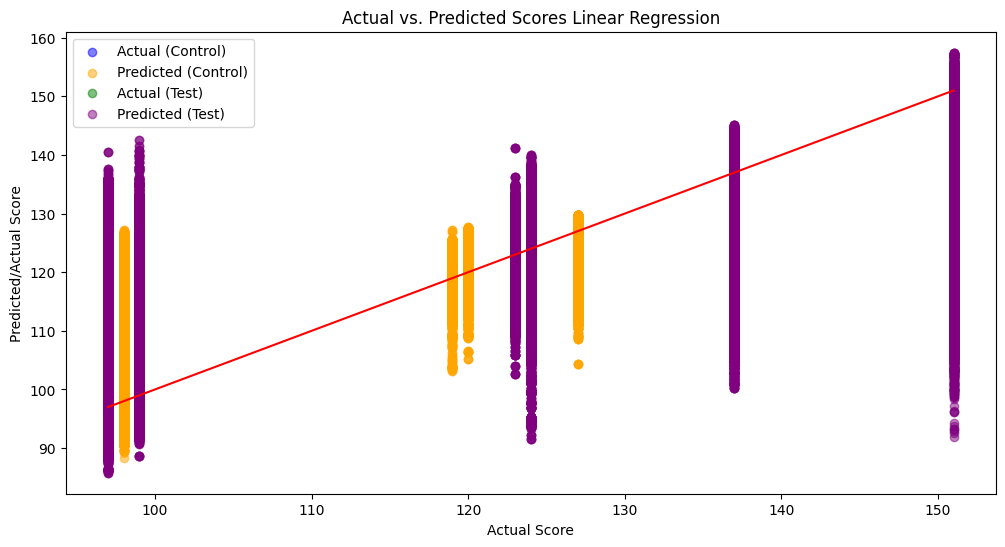

In [60]:
# Create a single plot for both groups
plt.figure(figsize=(12, 6))

# Plot actual and predicted scores for the control group
plt.scatter(y_control, y_control, alpha=0.5, label='Actual (Control)', color='blue')
plt.scatter(y_control, predictions_control, alpha=0.5, label='Predicted (Control)', color='orange')

# Plot actual and predicted scores for the test group
plt.scatter(y_test, y_test, alpha=0.5, label='Actual (Test)', color='green')
plt.scatter(y_test, predictions_test, alpha=0.5, label='Predicted (Test)', color='purple')

plt.title('Actual vs. Predicted Scores Linear Regression')
plt.xlabel('Actual Score')
plt.ylabel('Predicted/Actual Score')
plt.legend()
plt.plot([min(y_control.min(), y_test.min()), max(y_control.max(), y_test.max())], [min(y_control.min(), y_test.min()), max(y_control.max(), y_test.max())], color='red')  # identity line
plt.show()

In [59]:
# Calculate Correlation of Actual Scores and Predicted Scores - Control Group
correlation_control_lr = np.corrcoef(y_control, predictions_control)[0, 1]

# Calculate Correlation of Actual Scores and Predicted Scores - Test Group
correlation_test_lr = np.corrcoef(y_test, predictions_test)[0, 1]

# Print Correlation Values for Linear Regression
print(f"Correlation of Actual Scores and Predicted Scores - Control Group (Linear Regression): {correlation_control_lr:.2f}")
print(f"Correlation of Actual Scores and Predicted Scores - Test Group (Linear Regression): {correlation_test_lr:.2f}")

Correlation of Actual Scores and Predicted Scores - Control Group (Linear Regression): 0.80
Correlation of Actual Scores and Predicted Scores - Test Group (Linear Regression): 0.81


In [58]:
# Calculate Correlation of Top 3 Features with Actual Scores - Control Group
top3_features_control_lr = X_control.iloc[:, :3]
correlation_top3_control_lr = top3_features_control_lr.corrwith(y_control)

# Calculate Correlation of Top 3 Features with Actual Scores - Test Group
top3_features_test_lr = X_test.iloc[:, :3]
correlation_top3_test_lr = top3_features_test_lr.corrwith(y_test)

# Print Correlation of Top 3 Features for Linear Regression
print("\nCorrelation of Top 3 Features with Actual Scores - Control Group (Linear Regression):")
print(correlation_top3_control_lr)
print("\nCorrelation of Top 3 Features with Actual Scores - Test Group (Linear Regression):")
print(correlation_top3_test_lr)



Correlation of Top 3 Features with Actual Scores - Control Group (Linear Regression):
Pupil diameter left    -0.060418
Pupil diameter right   -0.060418
Gaze event duration    -0.071196
dtype: float64

Correlation of Top 3 Features with Actual Scores - Test Group (Linear Regression):
Pupil diameter left    -0.067000
Pupil diameter right   -0.067000
Gaze event duration    -0.051473
dtype: float64


# DecisionTreeRegressor

In [20]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=3, random_state=42) # You can adjust max_depth

# Training and evaluation for Decision Tree Regressor

print("Decision Tree Regressor - Control Group:")
dt_model.fit(X_control, y_control)
predictions_control = dt_model.predict(X_control)
print_metrics("Decision Tree Regressor", y_control, predictions_control)

print("Decision Tree Regressor - Test Group:")
dt_model.fit(X_test, y_test)
predictions_test = dt_model.predict(X_test)
print_metrics("Decision Tree Regressor", y_test, predictions_test)
print("\n")

Decision Tree Regressor - Control Group:
Decision Tree Regressor - R^2 Score: 0.39768663693026995
Decision Tree Regressor - Mean Squared Error: 37.064835157867094
Decision Tree Regressor - Mean Absolute Error: 3.0227666007981027
Decision Tree Regressor - Root Mean Squared Error: 6.088089614802586

Decision Tree Regressor - Test Group:
Decision Tree Regressor - R^2 Score: 0.3321473020636694
Decision Tree Regressor - Mean Squared Error: 170.95980513140785
Decision Tree Regressor - Mean Absolute Error: 8.363293630438791
Decision Tree Regressor - Root Mean Squared Error: 13.07515985108434





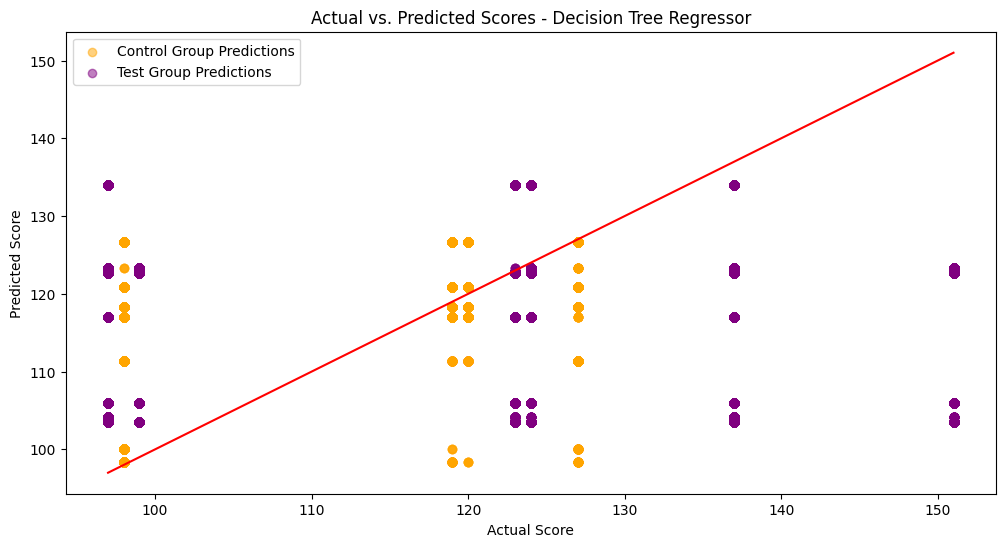

In [21]:
# Create a single plot for Decision Tree Regressor - Both Groups
plt.figure(figsize=(12, 6))
plt.scatter(y_control, predictions_control, alpha=0.5, label='Control Group Predictions', color='orange')
plt.scatter(y_test, predictions_test, alpha=0.5, label='Test Group Predictions', color='purple')
plt.title('Actual vs. Predicted Scores - Decision Tree Regressor')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.legend()
plt.plot([min(min(y_control), min(y_test)), max(max(y_control), max(y_test))], [min(min(y_control), min(y_test)), max(max(y_control), max(y_test))], color='red')  # identity line
plt.show()


In [61]:
# Calculate Correlation of Actual Scores and Predicted Scores - Control Group
correlation_control = np.corrcoef(y_control, predictions_control)[0, 1]

# Calculate Correlation of Actual Scores and Predicted Scores - Test Group
correlation_test = np.corrcoef(y_test, predictions_test)[0, 1]

# Print Correlation Values
print(f"Correlation of Actual Scores and Predicted Scores - Decision Tree Regressor - Control Group: {correlation_control:.2f}")
print(f"Correlation of Actual Scores and Predicted Scores - Decision Tree Regressor - Test Group: {correlation_test:.2f}")


Correlation of Actual Scores and Predicted Scores - Decision Tree Regressor - Control Group: 0.80
Correlation of Actual Scores and Predicted Scores - Decision Tree Regressor - Test Group: 0.81


In [62]:
# Calculate Correlation of Top 3 Features with Actual Scores - Control Group
top3_features_control = X_control.iloc[:, :3]
correlation_top3_control = top3_features_control.corrwith(y_control)

# Calculate Correlation of Top 3 Features with Actual Scores - Test Group
top3_features_test = X_test.iloc[:, :3]
correlation_top3_test = top3_features_test.corrwith(y_test)

# Print Correlation of Top 3 Features
print("\nCorrelation of Top 3 Features with Actual Scores - Decision Tree Regressor - Control Group:")
print(correlation_top3_control)
print("\nCorrelation of Top 3 Features with Actual Scores - Decision Tree Regressor - Test Group:")
print(correlation_top3_test)



Correlation of Top 3 Features with Actual Scores - Decision Tree Regressor - Control Group:
Pupil diameter left    -0.060418
Pupil diameter right   -0.060418
Gaze event duration    -0.071196
dtype: float64

Correlation of Top 3 Features with Actual Scores - Decision Tree Regressor - Test Group:
Pupil diameter left    -0.067000
Pupil diameter right   -0.067000
Gaze event duration    -0.051473
dtype: float64


# ElasticNet Regression

In [24]:
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  

# Training and evaluation for ElasticNet
print("ElasticNet - Control Group:")
elasticnet_model.fit(X_control, y_control)
predictions_control = elasticnet_model.predict(X_control)
print_metrics("ElasticNet", y_control, predictions_control)

print("ElasticNet - Test Group:")
elasticnet_model.fit(X_test, y_test)
predictions_test = elasticnet_model.predict(X_test)
print_metrics("ElasticNet", y_test, predictions_test)
print("\n")


ElasticNet - Control Group:
ElasticNet - R^2 Score: 0.08392831988593419
ElasticNet - Mean Squared Error: 56.37272539192747
ElasticNet - Mean Absolute Error: 5.153890904828252
ElasticNet - Root Mean Squared Error: 7.508177234983699

ElasticNet - Test Group:
ElasticNet - R^2 Score: 0.07819762772959515
ElasticNet - Mean Squared Error: 235.96693465486567
ElasticNet - Mean Absolute Error: 12.283790115496712
ElasticNet - Root Mean Squared Error: 15.361215272720635





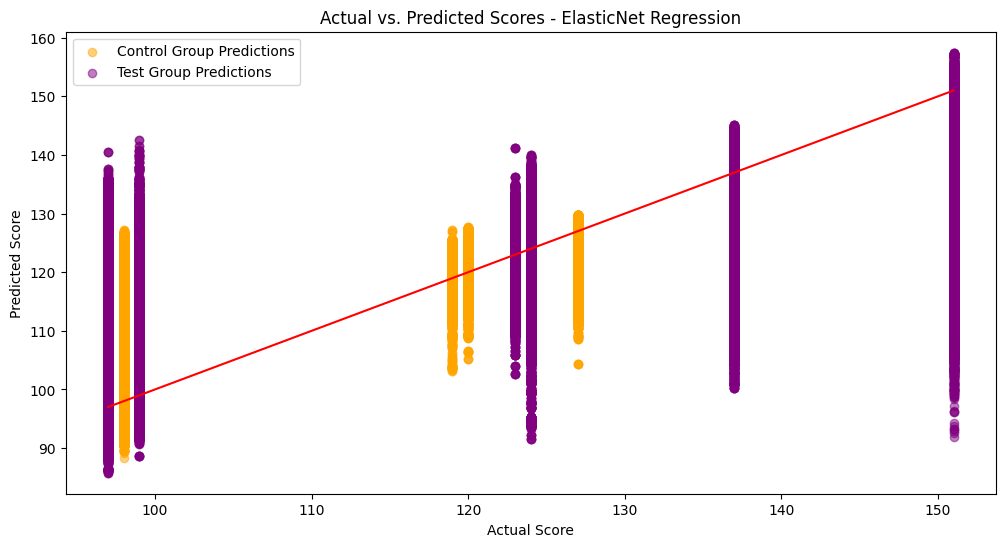

In [66]:
# Create a single plot for ElasticNet Regression - Both Groups
plt.figure(figsize=(12, 6))
plt.scatter(y_control, predictions_control, alpha=0.5, label='Control Group Predictions', color='orange')
plt.scatter(y_test, predictions_test, alpha=0.5, label='Test Group Predictions', color='purple')
plt.title('Actual vs. Predicted Scores - ElasticNet Regression')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.legend()
plt.plot([min(min(y_control), min(y_test)), max(max(y_control), max(y_test))], [min(min(y_control), min(y_test)), max(max(y_control), max(y_test))], color='red')  # identity line
plt.show()

In [28]:
# Calculate Correlation of Actual Scores and Predicted Scores - Control Group
correlation_control_elasticnet = np.corrcoef(y_control, predictions_control)[0, 1]

# Calculate Correlation of Actual Scores and Predicted Scores - Test Group
correlation_test_elasticnet = np.corrcoef(y_test, predictions_test)[0, 1]

# Print Correlation Values for ElasticNet Regression
print(f"Correlation of Actual Scores and Predicted Scores - ElasticNet (Control Group): {correlation_control_elasticnet:.2f}")
print(f"Correlation of Actual Scores and Predicted Scores - ElasticNet (Test Group): {correlation_test_elasticnet:.2f}")

Correlation of Actual Scores and Predicted Scores - ElasticNet (Control Group): 0.29
Correlation of Actual Scores and Predicted Scores - ElasticNet (Test Group): 0.28


In [30]:
# Calculate Correlation of Top 3 Features with Actual Scores - Control Group
top3_features_control = X_control.iloc[:, :3]
correlation_top3_control_elasticnet = top3_features_control.corrwith(y_control)

# Calculate Correlation of Top 3 Features with Actual Scores - Test Group
top3_features_test = X_test.iloc[:, :3]
correlation_top3_test_elasticnet = top3_features_test.corrwith(y_test)

# Print Correlation of Top 3 Features for ElasticNet Regression
print("\nCorrelation of Top 3 Features with Actual Scores - Control Group (ElasticNet):")
print(correlation_top3_control_elasticnet)
print("\nCorrelation of Top 3 Features with Actual Scores - Test Group (ElasticNet):")
print(correlation_top3_test_elasticnet)



Correlation of Top 3 Features with Actual Scores - Control Group (ElasticNet):
Pupil diameter left    -0.060418
Pupil diameter right   -0.060418
Gaze event duration    -0.071196
dtype: float64

Correlation of Top 3 Features with Actual Scores - Test Group (ElasticNet):
Pupil diameter left    -0.067000
Pupil diameter right   -0.067000
Gaze event duration    -0.051473
dtype: float64


# Gradient Boosting Regressor

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Training and evaluation for Gradient Boosting Regressor
print("Gradient Boosting Regressor - Control Group:")
gb_model.fit(X_control, y_control)
predictions_control = gb_model.predict(X_control)
print_metrics("Gradient Boosting Regressor", y_control, predictions_control)

print("Gradient Boosting Regressor - Test Group:")
gb_model.fit(X_test, y_test)
predictions_test = gb_model.predict(X_test)
print_metrics("Gradient Boosting Regressor", y_test, predictions_test)
print("\n")


Gradient Boosting Regressor - Control Group:
Gradient Boosting Regressor - R^2 Score: 0.6310153380018672
Gradient Boosting Regressor - Mean Squared Error: 22.7063792890791
Gradient Boosting Regressor - Mean Absolute Error: 2.411396259343957
Gradient Boosting Regressor - Root Mean Squared Error: 4.765121120084892

Gradient Boosting Regressor - Test Group:
Gradient Boosting Regressor - R^2 Score: 0.65181252324058
Gradient Boosting Regressor - Mean Squared Error: 89.1305273751577
Gradient Boosting Regressor - Mean Absolute Error: 6.0279237290288386
Gradient Boosting Regressor - Root Mean Squared Error: 9.440896534501249





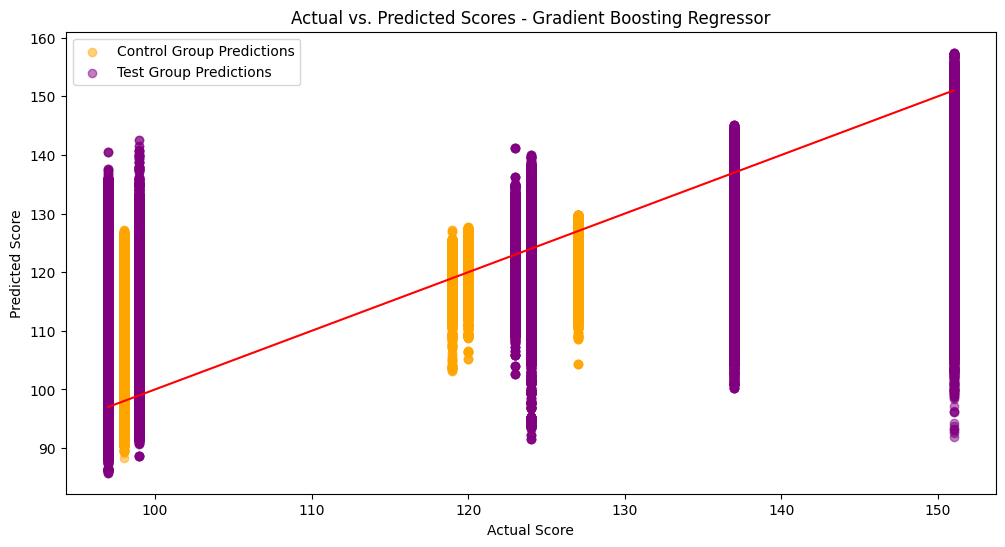

In [55]:
plt.figure(figsize=(12, 6))
plt.scatter(y_control, predictions_control, alpha=0.5, label='Control Group Predictions', color='orange')
plt.scatter(y_test, predictions_test, alpha=0.5, label='Test Group Predictions', color='purple')
plt.title('Actual vs. Predicted Scores - Gradient Boosting Regressor')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.legend()
plt.plot([min(min(y_control), min(y_test)), max(max(y_control), max(y_test))], [min(min(y_control), min(y_test)), max(max(y_control), max(y_test))], color='red')  # identity line
plt.show()


In [56]:
# Calculate Correlation of Actual Scores and Predicted Scores - Control Group
correlation_control_gb = np.corrcoef(y_control, predictions_control)[0, 1]

# Calculate Correlation of Actual Scores and Predicted Scores - Test Group
correlation_test_gb = np.corrcoef(y_test, predictions_test)[0, 1]

# Print Correlation Values for Gradient Boosting Regressor
print(f"Correlation of Actual Scores and Predicted Scores - Gradient Boosting (Control Group): {correlation_control_gb:.2f}")
print(f"Correlation of Actual Scores and Predicted Scores - Gradient Boosting (Test Group): {correlation_test_gb:.2f}")

Correlation of Actual Scores and Predicted Scores - Gradient Boosting (Control Group): 0.80
Correlation of Actual Scores and Predicted Scores - Gradient Boosting (Test Group): 0.81


In [57]:
# Calculate Correlation of Top 3 Features with Actual Scores - Control Group
top3_features_control_gb = X_control.iloc[:, :3]
correlation_top3_control_gb = top3_features_control_gb.corrwith(y_control)

# Calculate Correlation of Top 3 Features with Actual Scores - Test Group
top3_features_test_gb = X_test.iloc[:, :3]
correlation_top3_test_gb = top3_features_test_gb.corrwith(y_test)

# Print Correlation of Top 3 Features for Gradient Boosting Regressor
print("\nCorrelation of Top 3 Features with Actual Scores - Control Group (Gradient Boosting):")
print(correlation_top3_control_gb)
print("\nCorrelation of Top 3 Features with Actual Scores - Test Group (Gradient Boosting):")
print(correlation_top3_test_gb)



Correlation of Top 3 Features with Actual Scores - Control Group (Gradient Boosting):
Pupil diameter left    -0.060418
Pupil diameter right   -0.060418
Gaze event duration    -0.071196
dtype: float64

Correlation of Top 3 Features with Actual Scores - Test Group (Gradient Boosting):
Pupil diameter left    -0.067000
Pupil diameter right   -0.067000
Gaze event duration    -0.051473
dtype: float64


# RandomForestRegressor


In [36]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training and evaluation for Random Forest Regressor
print("Random Forest Regressor - Control Group:")
rf_model.fit(X_control, y_control)
predictions_control_rf = rf_model.predict(X_control)
print_metrics("Random Forest Regressor", y_control, predictions_control_rf)

print("Random Forest Regressor - Test Group:")
rf_model.fit(X_test, y_test)
predictions_test_rf = rf_model.predict(X_test)
print_metrics("Random Forest Regressor", y_test, predictions_test_rf)


Random Forest Regressor - Control Group:
Random Forest Regressor - R^2 Score: 0.9193777979470075
Random Forest Regressor - Mean Squared Error: 4.961285623696967
Random Forest Regressor - Mean Absolute Error: 0.44999799535206164
Random Forest Regressor - Root Mean Squared Error: 2.227394357471745

Random Forest Regressor - Test Group:
Random Forest Regressor - R^2 Score: 0.916253507350614
Random Forest Regressor - Mean Squared Error: 21.437787266591002
Random Forest Regressor - Mean Absolute Error: 1.0038504928012013
Random Forest Regressor - Root Mean Squared Error: 4.630095816135018



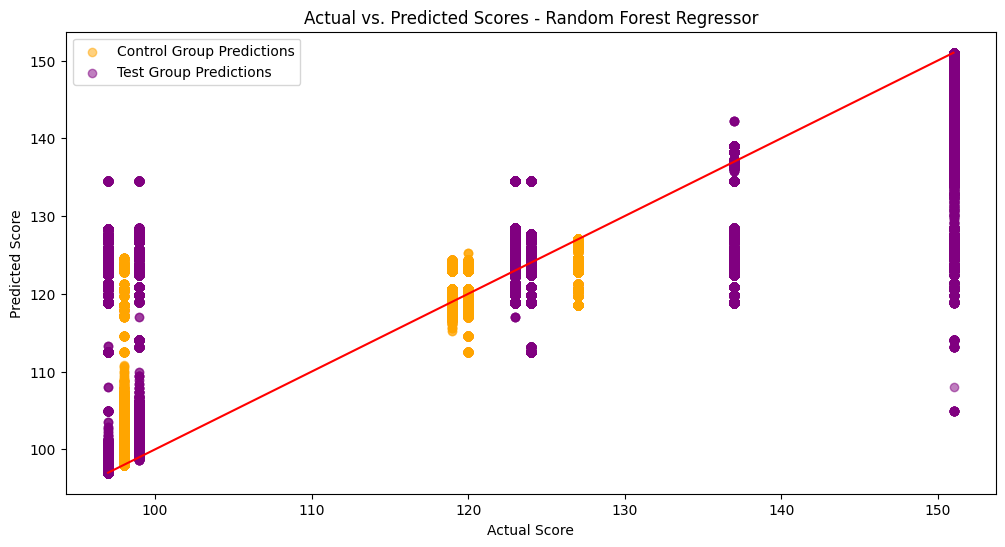

In [43]:
plt.figure(figsize=(12, 6))
plt.scatter(y_control, predictions_control_rf, alpha=0.5, label='Control Group Predictions', color='orange')
plt.scatter(y_test, predictions_test_rf, alpha=0.5, label='Test Group Predictions', color='purple')
plt.title('Actual vs. Predicted Scores - Random Forest Regressor')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.legend()
plt.plot([min(min(y_control), min(y_test)), max(max(y_control), max(y_test))], [min(min(y_control), min(y_test)), max(max(y_control), max(y_test))], color='red')  # identity line
plt.show()


In [42]:
# Calculate Correlation of Actual Scores and Predicted Scores - Control Group
correlation_control_rf = np.corrcoef(y_control, predictions_control_rf)[0, 1]

# Calculate Correlation of Actual Scores and Predicted Scores - Test Group
correlation_test_rf = np.corrcoef(y_test, predictions_test_rf)[0, 1]

# Print Correlation Values for Random Forest Regressor
print(f"Correlation of Actual Scores and Predicted Scores - Random Forest (Control Group): {correlation_control_rf:.2f}")
print(f"Correlation of Actual Scores and Predicted Scores - Random Forest (Test Group): {correlation_test_rf:.2f}")


Correlation of Actual Scores and Predicted Scores - Random Forest (Control Group): 0.96
Correlation of Actual Scores and Predicted Scores - Random Forest (Test Group): 0.96


In [44]:
# Calculate Correlation of Top 3 Features with Actual Scores - Control Group
top3_features_control = X_control.iloc[:, :3]
correlation_top3_control_rf = top3_features_control.corrwith(y_control)

# Calculate Correlation of Top 3 Features with Actual Scores - Test Group
top3_features_test = X_test.iloc[:, :3]
correlation_top3_test_rf = top3_features_test.corrwith(y_test)

# Print Correlation of Top 3 Features for Random Forest Regressor
print("\nCorrelation of Top 3 Features with Actual Scores - Control Group (Random Forest):")
print(correlation_top3_control_rf)
print("\nCorrelation of Top 3 Features with Actual Scores - Test Group (Random Forest):")
print(correlation_top3_test_rf)



Correlation of Top 3 Features with Actual Scores - Control Group (Random Forest):
Pupil diameter left    -0.060418
Pupil diameter right   -0.060418
Gaze event duration    -0.071196
dtype: float64

Correlation of Top 3 Features with Actual Scores - Test Group (Random Forest):
Pupil diameter left    -0.067000
Pupil diameter right   -0.067000
Gaze event duration    -0.051473
dtype: float64


# K-Nearest Neighbors Regression

In [37]:
from sklearn.neighbors import KNeighborsRegressor

# Create a K-Nearest Neighbors Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Training and evaluation for K-Nearest Neighbors Regressor
print("K-Nearest Neighbors Regressor - Control Group:")
knn_model.fit(X_control, y_control)
predictions_control_knn = knn_model.predict(X_control)
print_metrics("K-Nearest Neighbors Regressor", y_control, predictions_control_knn)

print("K-Nearest Neighbors Regressor - Test Group:")
knn_model.fit(X_test, y_test)
predictions_test_knn = knn_model.predict(X_test)
print_metrics("K-Nearest Neighbors Regressor", y_test, predictions_test_knn)


K-Nearest Neighbors Regressor - Control Group:
K-Nearest Neighbors Regressor - R^2 Score: 0.8189793467543667
K-Nearest Neighbors Regressor - Mean Squared Error: 11.139551409790084
K-Nearest Neighbors Regressor - Mean Absolute Error: 0.7075713471327459
K-Nearest Neighbors Regressor - Root Mean Squared Error: 3.3375966517525875

K-Nearest Neighbors Regressor - Test Group:
K-Nearest Neighbors Regressor - R^2 Score: 0.8559877213683295
K-Nearest Neighbors Regressor - Mean Squared Error: 36.864882282391505
K-Nearest Neighbors Regressor - Mean Absolute Error: 1.5130403299488342
K-Nearest Neighbors Regressor - Root Mean Squared Error: 6.071645763908786



In [45]:
# Calculate Correlation of Actual Scores and Predicted Scores - Control Group
correlation_control_knn = np.corrcoef(y_control, predictions_control_knn)[0, 1]

# Calculate Correlation of Actual Scores and Predicted Scores - Test Group
correlation_test_knn = np.corrcoef(y_test, predictions_test_knn)[0, 1]

# Print Correlation Values for K-Nearest Neighbors Regressor
print(f"Correlation of Actual Scores and Predicted Scores - K-Nearest Neighbors (Control Group): {correlation_control_knn:.2f}")
print(f"Correlation of Actual Scores and Predicted Scores - K-Nearest Neighbors (Test Group): {correlation_test_knn:.2f}")


Correlation of Actual Scores and Predicted Scores - K-Nearest Neighbors (Control Group): 0.91
Correlation of Actual Scores and Predicted Scores - K-Nearest Neighbors (Test Group): 0.93


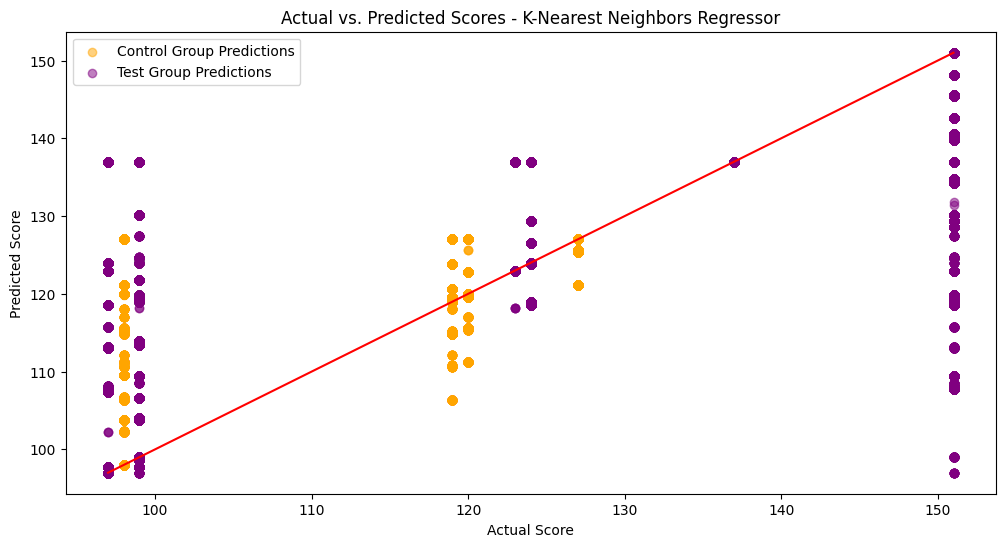

In [46]:
plt.figure(figsize=(12, 6))
plt.scatter(y_control, predictions_control_knn, alpha=0.5, label='Control Group Predictions', color='orange')
plt.scatter(y_test, predictions_test_knn, alpha=0.5, label='Test Group Predictions', color='purple')
plt.title('Actual vs. Predicted Scores - K-Nearest Neighbors Regressor')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.legend()
plt.plot([min(min(y_control), min(y_test)), max(max(y_control), max(y_test))], [min(min(y_control), min(y_test)), max(max(y_control), max(y_test))], color='red')  # identity line
plt.show()


In [47]:
# Calculate Correlation of Top 3 Features with Actual Scores - Control Group
top3_features_control = X_control.iloc[:, :3]
correlation_top3_control_knn = top3_features_control.corrwith(y_control)

# Calculate Correlation of Top 3 Features with Actual Scores - Test Group
top3_features_test = X_test.iloc[:, :3]
correlation_top3_test_knn = top3_features_test.corrwith(y_test)

# Print Correlation of Top 3 Features for K-Nearest Neighbors Regressor
print("\nCorrelation of Top 3 Features with Actual Scores - Control Group (KNN):")
print(correlation_top3_control_knn)
print("\nCorrelation of Top 3 Features with Actual Scores - Test Group (KNN):")
print(correlation_top3_test_knn)



Correlation of Top 3 Features with Actual Scores - Control Group (KNN):
Pupil diameter left    -0.060418
Pupil diameter right   -0.060418
Gaze event duration    -0.071196
dtype: float64

Correlation of Top 3 Features with Actual Scores - Test Group (KNN):
Pupil diameter left    -0.067000
Pupil diameter right   -0.067000
Gaze event duration    -0.051473
dtype: float64


# Neural Networks

In [38]:
from sklearn.neural_network import MLPRegressor

# Create a Neural Network Regressor model
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000, random_state=42)

# Training and evaluation for Neural Network Regressor - Control Group
print("Neural Network Regressor - Control Group:")
nn_model.fit(X_control, y_control)
predictions_control_nn = nn_model.predict(X_control)
print_metrics("Neural Network Regressor", y_control, predictions_control_nn)

# Training and evaluation for Neural Network Regressor - Test Group
print("Neural Network Regressor - Test Group:")
nn_model.fit(X_test, y_test)
predictions_test_nn = nn_model.predict(X_test)
print_metrics("Neural Network Regressor", y_test, predictions_test_nn)


Neural Network Regressor - Control Group:
Neural Network Regressor - R^2 Score: -7944405.075033425
Neural Network Regressor - Mean Squared Error: 488878579.909877
Neural Network Regressor - Mean Absolute Error: 7816.877626156794
Neural Network Regressor - Root Mean Squared Error: 22110.598813914494

Neural Network Regressor - Test Group:
Neural Network Regressor - R^2 Score: 0.6153758434290768
Neural Network Regressor - Mean Squared Error: 98.45774533722982
Neural Network Regressor - Mean Absolute Error: 5.981427007049398
Neural Network Regressor - Root Mean Squared Error: 9.922587633134304



In [52]:
# Calculate Correlation of Actual Scores and Predicted Scores - Control Group
correlation_control_knn = np.corrcoef(y_control, predictions_control_nn)[0, 1]

# Calculate Correlation of Actual Scores and Predicted Scores - Test Group
correlation_test_knn = np.corrcoef(y_test, predictions_test_nn)[0, 1]

# Print Correlation Values for K-Nearest Neighbors Regressor
print(f"Correlation of Actual Scores and Predicted Scores - Neural Network Regressor (Control Group): {correlation_control_knn:.2f}")
print(f"Correlation of Actual Scores and Predicted Scores -Neural Network Regressor (Test Group): {correlation_test_knn:.2f}")


Correlation of Actual Scores and Predicted Scores - Neural Network Regressor (Control Group): -0.04
Correlation of Actual Scores and Predicted Scores -Neural Network Regressor (Test Group): 0.79


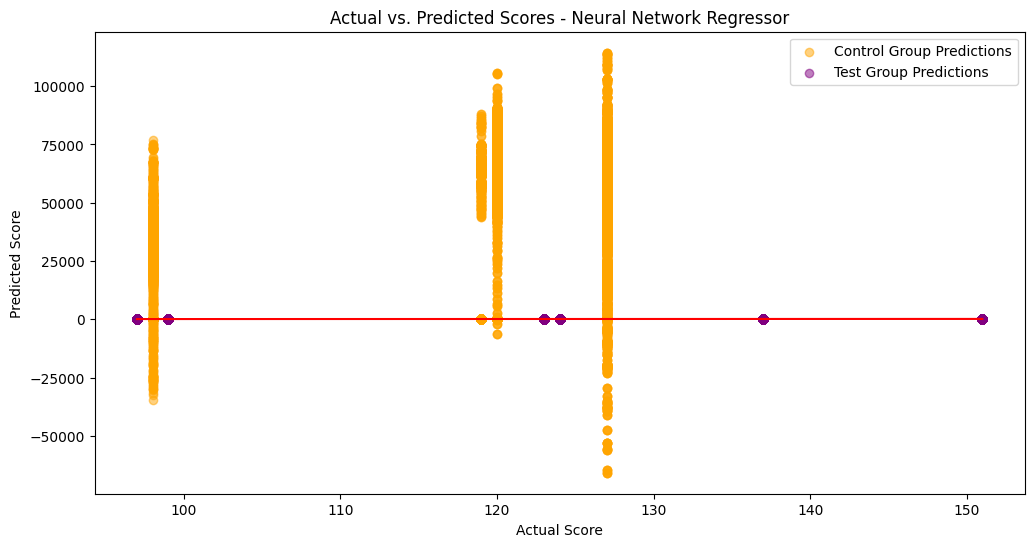

In [48]:
# Create a single plot for Neural Network Regressor - Both Groups
plt.figure(figsize=(12, 6))
plt.scatter(y_control, predictions_control_nn, alpha=0.5, label='Control Group Predictions', color='orange')
plt.scatter(y_test, predictions_test_nn, alpha=0.5, label='Test Group Predictions', color='purple')
plt.title('Actual vs. Predicted Scores - Neural Network Regressor')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.legend()
plt.plot([min(min(y_control), min(y_test)), max(max(y_control), max(y_test))], [min(min(y_control), min(y_test)), max(max(y_control), max(y_test))], color='red')  # identity line
plt.show()

In [53]:
# Calculate Correlation of Top 3 Features with Actual Scores - Control Group
top3_features_control = X_control.iloc[:, :3]
correlation_top3_control_nn = top3_features_control.corrwith(y_control)

# Calculate Correlation of Top 3 Features with Actual Scores - Test Group
top3_features_test = X_test.iloc[:, :3]
correlation_top3_test_nn = top3_features_test.corrwith(y_test)

# Print Correlation of Top 3 Features for Neural Network Regressor
print("\nCorrelation of Top 3 Features with Actual Scores - Control Group (Neural Network):")
print(correlation_top3_control_nn)
print("\nCorrelation of Top 3 Features with Actual Scores - Test Group (Neural Network):")
print(correlation_top3_test_nn)


Correlation of Top 3 Features with Actual Scores - Control Group (Neural Network):
Pupil diameter left    -0.060418
Pupil diameter right   -0.060418
Gaze event duration    -0.071196
dtype: float64

Correlation of Top 3 Features with Actual Scores - Test Group (Neural Network):
Pupil diameter left    -0.067000
Pupil diameter right   -0.067000
Gaze event duration    -0.051473
dtype: float64



# Unsupervised Learning

Performing K-means Clustering.

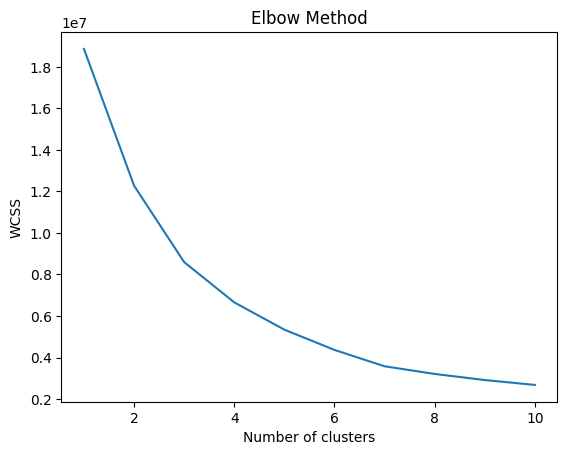

In [46]:
# Select the columns to be used in the clustering analysis
X = data[['Gaze point X', 'Gaze point Y', 'Gaze point left X', 'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y']]

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

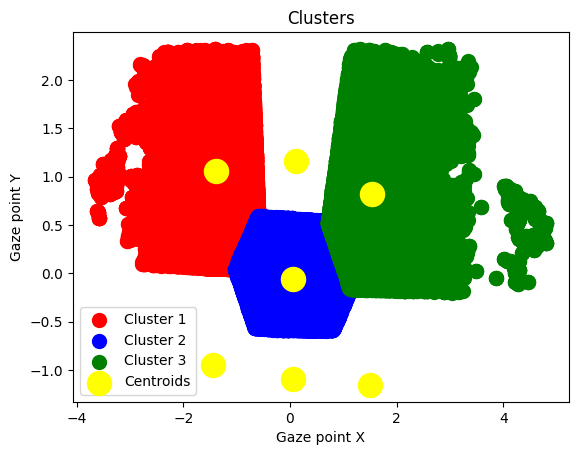

C:\Users\vinit\AppData\Local\Temp\ipykernel_7000\844439173.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_mean.append(cleaned_data[cleaned_data['cluster'] == i][cleaned_data['Gaze event duration'] == score]['Gaze event duration'].count())
C:\Users\vinit\AppData\Local\Temp\ipykernel_7000\844439173.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_mean.append(cleaned_data[cleaned_data['cluster'] == i][cleaned_data['Gaze event duration'] == score]['Gaze event duration'].count())
C:\Users\vinit\AppData\Local\Temp\ipykernel_7000\844439173.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_mean.append(cleaned_data[cleaned_data['cluster'] == i][cleaned_data['Gaze event duration'] == score]['Gaze event duration'].count())
C:\Users\vinit\AppData\Local\Temp\ipykernel_7000\844439173.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c

Cluster 1 Gaze event duration score: 1466.7003484320558


C:\Users\vinit\AppData\Local\Temp\ipykernel_7000\844439173.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_mean.append(cleaned_data[cleaned_data['cluster'] == i][cleaned_data['Gaze event duration'] == score]['Gaze event duration'].count())
C:\Users\vinit\AppData\Local\Temp\ipykernel_7000\844439173.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_mean.append(cleaned_data[cleaned_data['cluster'] == i][cleaned_data['Gaze event duration'] == score]['Gaze event duration'].count())
C:\Users\vinit\AppData\Local\Temp\ipykernel_7000\844439173.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_mean.append(cleaned_data[cleaned_data['cluster'] == i][cleaned_data['Gaze event duration'] == score]['Gaze event duration'].count())
C:\Users\vinit\AppData\Local\Temp\ipykernel_7000\844439173.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c

Cluster 2 Gaze event duration score: 3075.4634146341464


C:\Users\vinit\AppData\Local\Temp\ipykernel_7000\844439173.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_mean.append(cleaned_data[cleaned_data['cluster'] == i][cleaned_data['Gaze event duration'] == score]['Gaze event duration'].count())
C:\Users\vinit\AppData\Local\Temp\ipykernel_7000\844439173.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_mean.append(cleaned_data[cleaned_data['cluster'] == i][cleaned_data['Gaze event duration'] == score]['Gaze event duration'].count())
C:\Users\vinit\AppData\Local\Temp\ipykernel_7000\844439173.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_mean.append(cleaned_data[cleaned_data['cluster'] == i][cleaned_data['Gaze event duration'] == score]['Gaze event duration'].count())
C:\Users\vinit\AppData\Local\Temp\ipykernel_7000\844439173.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c

Cluster 3 Gaze event duration score: 1017.2369337979094


C:\Users\vinit\AppData\Local\Temp\ipykernel_7000\844439173.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_mean.append(cleaned_data[cleaned_data['cluster'] == i][cleaned_data['Gaze event duration'] == score]['Gaze event duration'].count())
C:\Users\vinit\AppData\Local\Temp\ipykernel_7000\844439173.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_mean.append(cleaned_data[cleaned_data['cluster'] == i][cleaned_data['Gaze event duration'] == score]['Gaze event duration'].count())
C:\Users\vinit\AppData\Local\Temp\ipykernel_7000\844439173.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_mean.append(cleaned_data[cleaned_data['cluster'] == i][cleaned_data['Gaze event duration'] == score]['Gaze event duration'].count())


In [47]:
# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
data['cluster'] = y_kmeans

# Plot the clusters in 2D space
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Gaze point X')
plt.ylabel('Gaze point Y')
plt.legend()
plt.show()

# Calculate the average gaze duration for each cluster
empathy_scores = data['Gaze event duration'].unique()
for i in range(3):
    cluster_mean = []
    for score in empathy_scores:
        cluster_mean.append(data[data['cluster'] == i][data['Gaze event duration'] == score]['Gaze event duration'].count())
    print('Cluster', i+1, 'Gaze event duration score:', sum(cluster_mean) / len(cluster_mean))

In [48]:
data = data.drop('cluster', axis=1)

# Modelling of the data

In [49]:
from sklearn.preprocessing import LabelEncoder

# select categorical columns
cat_cols = data.select_dtypes(include='object').columns.tolist()

# initialize label encoder object
label_encoder = LabelEncoder()

# encode categorical columns
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [50]:
new_data_b = pd.concat([data, new_data_a['Gaze event duration']], axis=1)

In [51]:
X = new_data_b.drop('Gaze event duration',axis=1)
y = new_data_b['Gaze event duration']

In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping


# split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

# define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)


# compile the model
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae', 'mse'])

# train the model
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_val_scaled, y_val), batch_size=128, callbacks=[early_stop])

# evaluate the model on the test set
results = model.evaluate(X_test_scaled, y_test)
print("test loss, test mae, test mse:", results)


Epoch 1/25
15719/15719 [==============================] - 45s 3ms/step - loss: 70788.5547 - mae: 144.0615 - mse: 70788.5547 - val_loss: 64472.2031 - val_mae: 134.9700 - val_mse: 64472.2031
Epoch 2/25
15719/15719 [==============================] - 51s 3ms/step - loss: 65748.9219 - mae: 135.9092 - mse: 65748.9219 - val_loss: 62495.5156 - val_mae: 129.5448 - val_mse: 62495.5156
Epoch 3/25
15719/15719 [==============================] - 57s 4ms/step - loss: 64686.9453 - mae: 134.7161 - mse: 64686.9453 - val_loss: 61896.1836 - val_mae: 128.0091 - val_mse: 61896.1836
Epoch 4/25
15719/15719 [==============================] - 44s 3ms/step - loss: 63880.3242 - mae: 133.9733 - mse: 63880.3242 - val_loss: 61072.1133 - val_mae: 127.7946 - val_mse: 61072.1133
Epoch 5/25
15719/15719 [==============================] - 46s 3ms/step - loss: 63135.2852 - mae: 133.4267 - mse: 63135.2852 - val_loss: 60249.1562 - val_mae: 126.0216 - val_mse: 60249.1562
Epoch 6/25
15719/15719 [==============================]

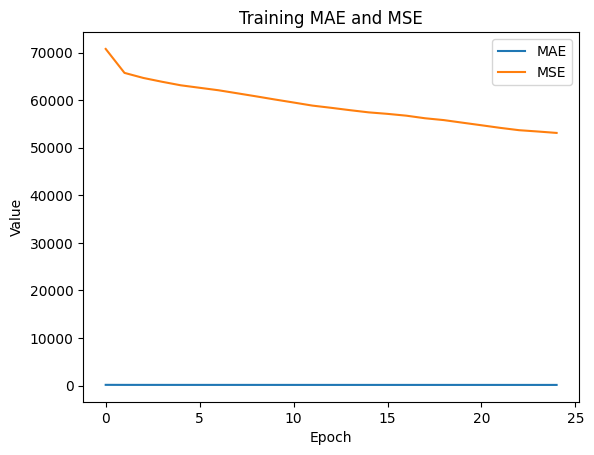

In [42]:
# Get the MAE and MSE values from the history object
mae = history.history['mae']
mse = history.history['mse']

# Plot the MAE and MSE curves
plt.plot(mae, label='MAE')
plt.plot(mse, label='MSE')
plt.title('Training MAE and MSE')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

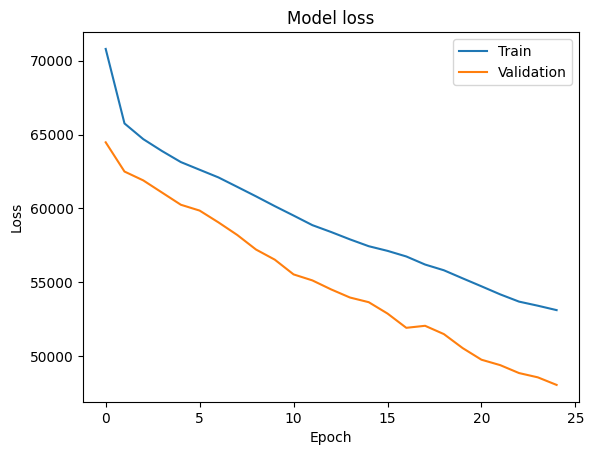

In [43]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Lasso and Ridge Regression.

In [44]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [45]:
# Create Lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Make predictions on test data using Lasso model
y_pred_lasso = lasso_model.predict(X_test)

# Calculate Lasso regression metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
# calculating MAE for Lasso regression
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("Lasso Regression metrics:")
print("Mean Squared Error: ", mse_lasso)
print("R^2 Score: ", r2_lasso)
print("Mean absolute Error:",mae_lasso)

# Create Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Make predictions on test data using Ridge model
y_pred_ridge = ridge_model.predict(X_test)

# Calculate Ridge regression metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
# calculating MAE for Ridge regression
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)


print("Ridge Regression metrics:")
print("Mean Squared Error: ", mse_ridge)
print("R^2 Score: ", r2_ridge)
print("Mean absolute Error:",mae_ridge)

C:\Users\vinit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.163e+10, tolerance: 1.814e+07
  model = cd_fast.enet_coordinate_descent(


Lasso Regression metrics:
Mean Squared Error:  80429.13470741922
R^2 Score:  0.10123409709135611
Mean absolute Error: 171.43819023933423


C:\Users\vinit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.63289e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge Regression metrics:
Mean Squared Error:  79223.6249721243
R^2 Score:  0.11470522356373314
Mean absolute Error: 169.2875512462439


# For Classification 

In [64]:
new_data_b.columns = [col.strip() for col in new_data_b.columns]
print (new_data_b.columns)

Index(['Recording timestamp', 'Computer timestamp', 'Recording duration',
       'Recording resolution height', 'Recording resolution width',
       'Eyetracker timestamp', 'Gaze point X', 'Gaze point Y',
       'Gaze point left X', 'Gaze point left Y', 'Gaze point right X',
       'Gaze point right Y', 'Presented Media width', 'Presented Media height',
       'Presented Media position X (DACSpx)',
       'Presented Media position Y (DACSpx)', 'Original Media width',
       'Original Media height', 'Gaze event duration',
       'Eye movement type index', 'Gaze event duration'],
      dtype='object')


In [67]:
class_X = new_data_b.drop('Eye movement type index',axis=1)
class_y = new_data_b['Eye movement type index']

In [68]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#splitting dataset again into the train , validation and test set.
X_train, X_test, y_train, y_test = train_test_split(class_X, class_y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)


# reshape input data for GRU layer
X_train_gru = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_val_gru = np.reshape(X_val, (X_val.shape[0], X_val.shape[1]))
X_test_gru = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))


# Define the model architecture
model = Sequential()

# Add GRU layer
model.add(GRU(64, activation='relu', input_shape=(X_train.shape[1], 1)))


# Add dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Add dense output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set early stopping criteria to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(X_train_gru, y_train, epochs=10, batch_size=64, validation_data=(X_val_gru, y_val), callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_gru, y_test)

# Make predictions on test data
y_pred = model.predict(X_test_gru)


Epoch 1/10


C:\Users\vinit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


31438/31438 [==============================] - 419s 13ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
31438/31438 [==============================] - 8457s 269ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
 3478/31438 [==>...........................] - ETA: 8:53 - loss: nan - accuracy: 0.0000e+00

KeyboardInterrupt: 

# Model Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Decision Tree', 'ElasticNet', 'Gradient Boosting', 
          'Random Forest', 'K-Nearest Neighbors', 'Neural Networks']

# Metrics for Control Group
r2_control = [0.0859, 0.3977, 0.0839, 0.6310, 0.9194, 0.8190, -7944405.0750]
mse_control = [56.2487, 37.0648, 56.3727, 22.7064, 4.9613, 11.1396, 488878579.9099]
mae_control = [5.1457, 3.0228, 5.1539, 2.4114, 0.4500, 0.7076, 7816.8776]
rmse_control = [7.4999, 6.0881, 7.5082, 4.7651, 2.2274, 3.3376, 22110.5988]

# Metrics for Test Group
r2_test = [0.0789, 0.3321, 0.0782, 0.6518, 0.9163, 0.8560, 0.6154]
mse_test = [235.7893, 170.9598, 235.9669, 89.1305, 21.4378, 36.8649, 98.4577]
mae_test = [12.2950, 8.3633, 12.2838, 6.0279, 1.0039, 1.5130, 5.9814]
rmse_test = [15.3554, 13.0752, 15.3612, 9.4409, 4.6301, 6.0716, 9.9226]
correlation_control = [0.80, 0.80, 0.29, 0.80, 0.96, 0.91, -0.04]
correlation_test = [0.81, 0.81, 0.28, 0.81, 0.96, 0.93, 0.79]

# Creating the DataFrame
data = {
    'Model': models,
    'R^2 Score (Control)': r2_control,
    'MSE (Control)': mse_control,
    'MAE (Control)': mae_control,
    'RMSE (Control)': rmse_control,
    'R^2 Score (Test)': r2_test,
    'MSE (Test)': mse_test,
    'MAE (Test)': mae_test,
    'RMSE (Test)': rmse_test,
    'Correlation_Control' : correlation_control,
    'Correlation_Test' : correlation_test

}

df = pd.DataFrame(data)
print(df)

# Transposing data for correct orientation in table
table_data = list(map(list, zip(*data.values())))

# Create table
fig, ax = plt.subplots(figsize=(18, 8))  # set the size that you'd like (width, height)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=table_data,
         colLabels=list(data.keys()),  # Convert dict_keys to list
         cellLoc='center',
         loc='center')

plt.show()



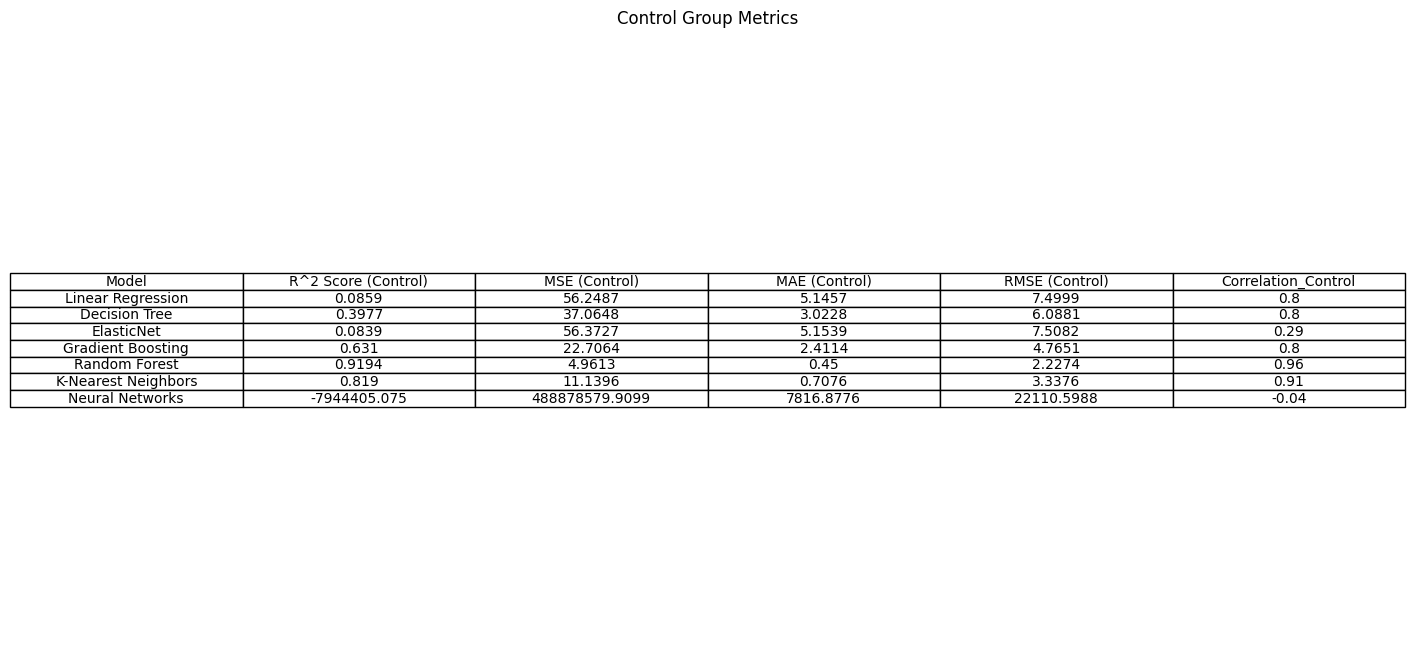

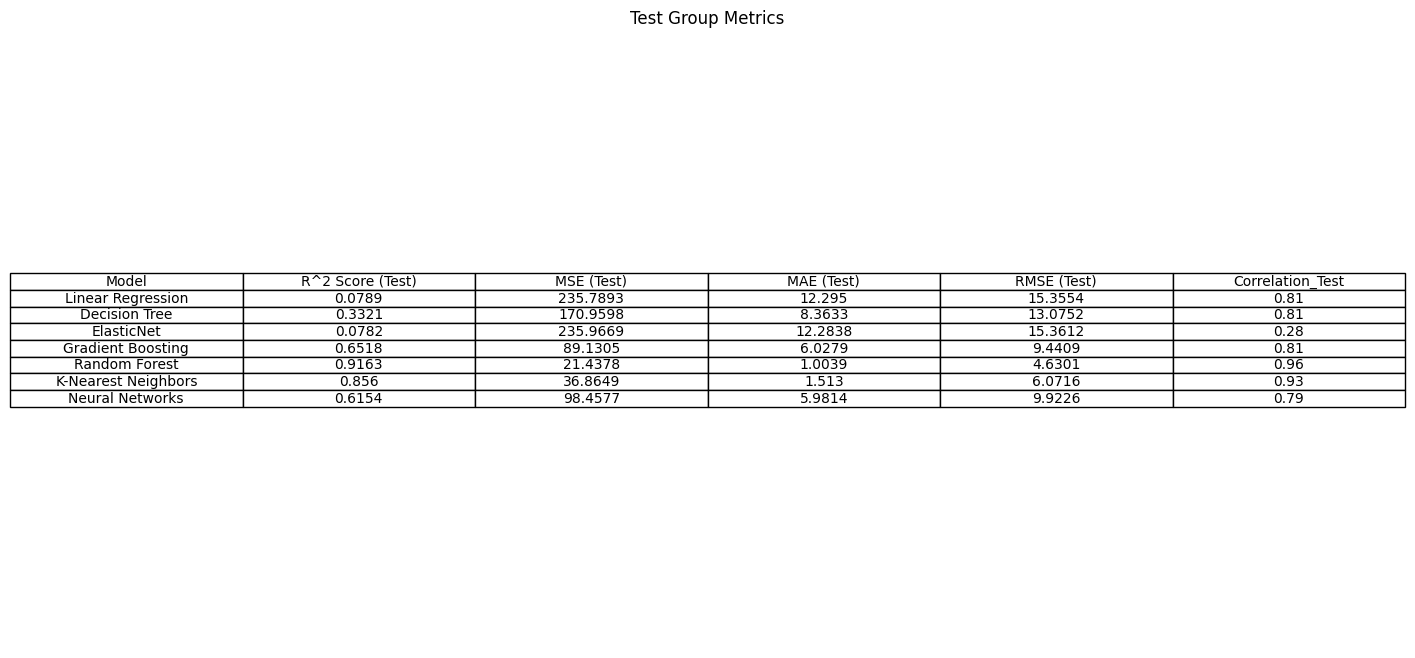

In [16]:
# Control Group Data
data_control = {
    'Model': models,
    'R^2 Score (Control)': r2_control,
    'MSE (Control)': mse_control,
    'MAE (Control)': mae_control,
    'RMSE (Control)': rmse_control,
    'Correlation_Control' : correlation_control
}

# Test Group Data
data_test = {
    'Model': models,
    'R^2 Score (Test)': r2_test,
    'MSE (Test)': mse_test,
    'MAE (Test)': mae_test,
    'RMSE (Test)': rmse_test,
    'Correlation_Test' : correlation_test
}

# Transposing data for correct orientation in table
table_data_control = list(map(list, zip(*data_control.values())))
table_data_test = list(map(list, zip(*data_test.values())))

# Create Control Group table
fig_control, ax_control = plt.subplots(figsize=(18, 8))  # set the size that you'd like (width, height)
ax_control.axis('tight')
ax_control.axis('off')
ax_control.set_title('Control Group Metrics')
ax_control.table(cellText=table_data_control,
                 colLabels=list(data_control.keys()),
                 cellLoc='center',
                 loc='center')

# Create Test Group table
fig_test, ax_test = plt.subplots(figsize=(18, 8))  # set the size that you'd like (width, height)
ax_test.axis('tight')
ax_test.axis('off')
ax_test.set_title('Test Group Metrics')
ax_test.table(cellText=table_data_test,
              colLabels=list(data_test.keys()),
              cellLoc='center',
              loc='center')

plt.show()


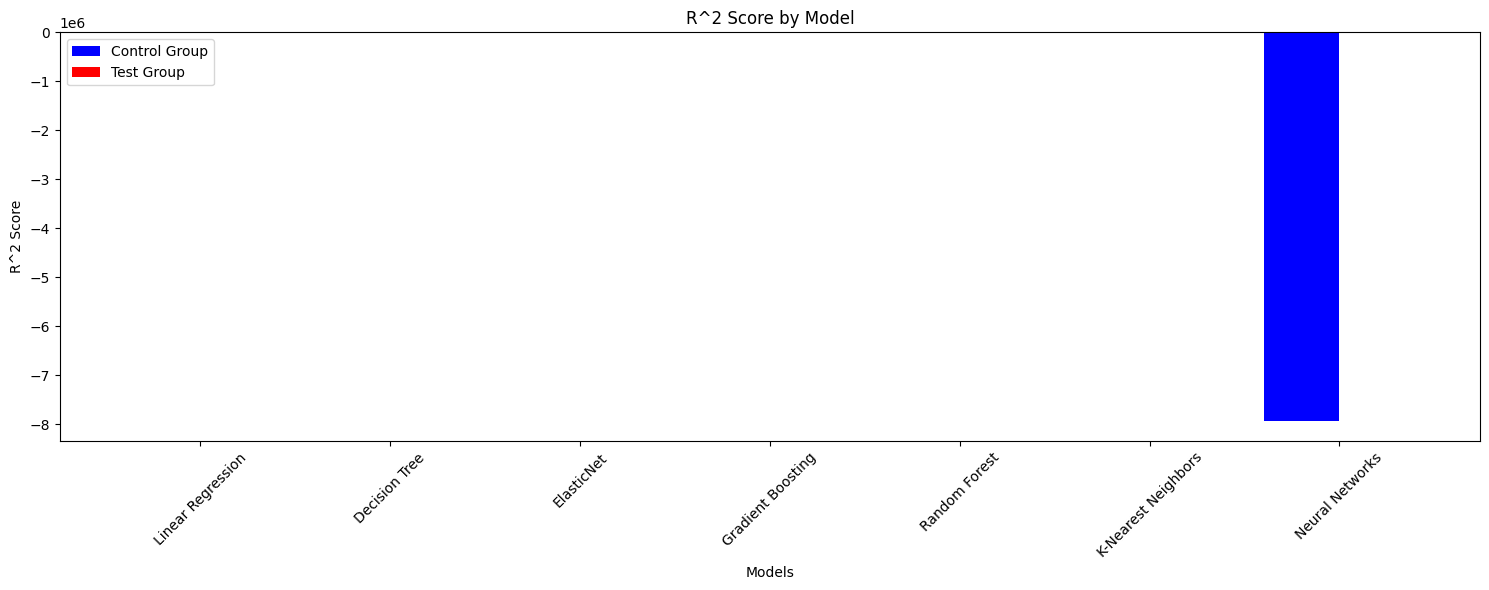

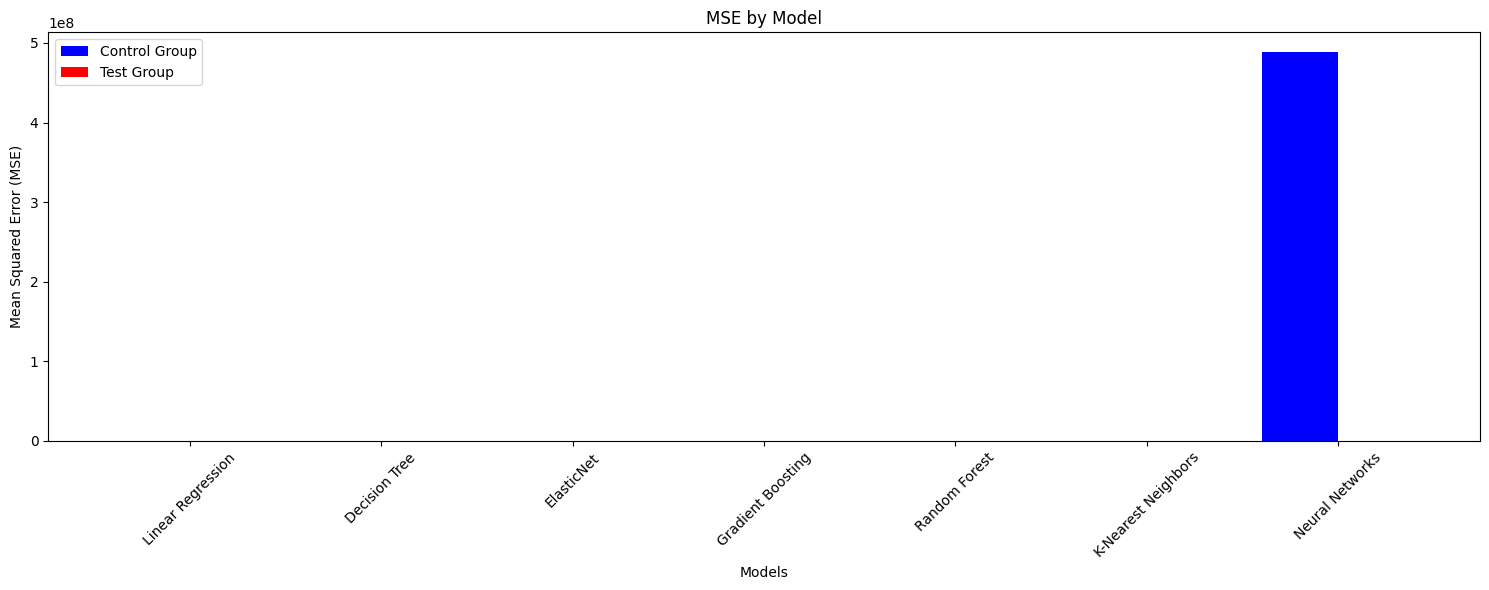

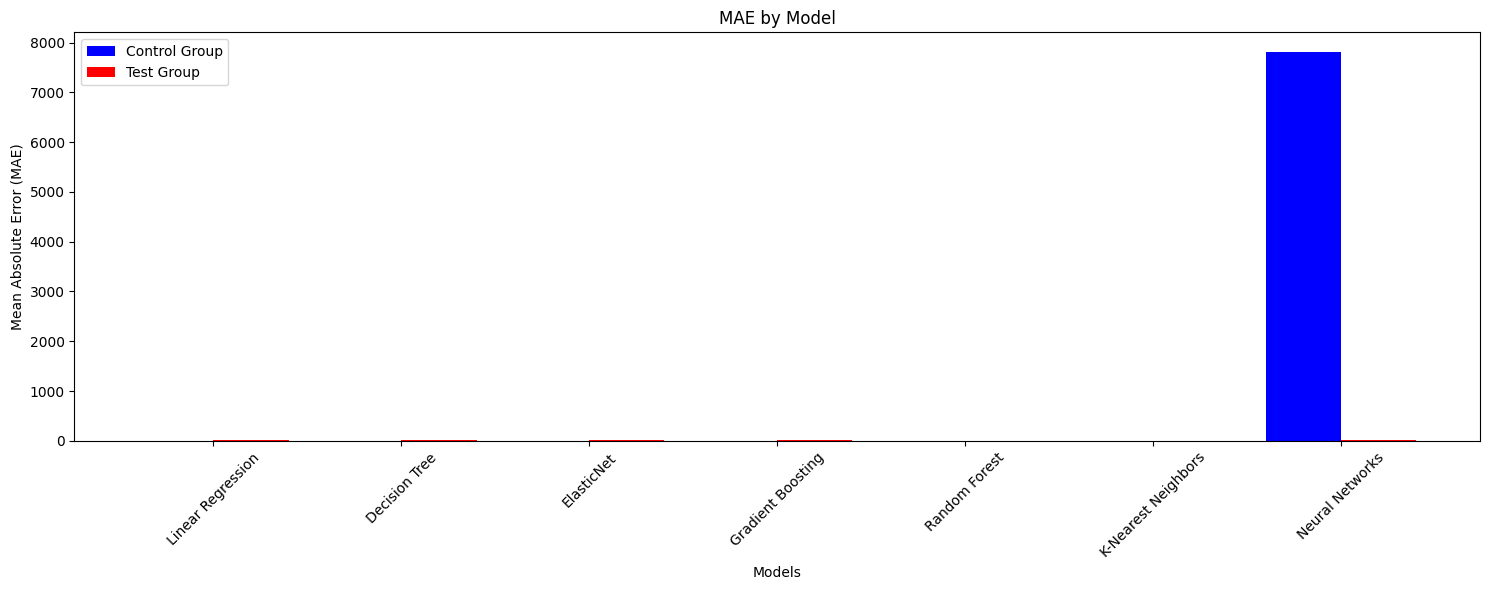

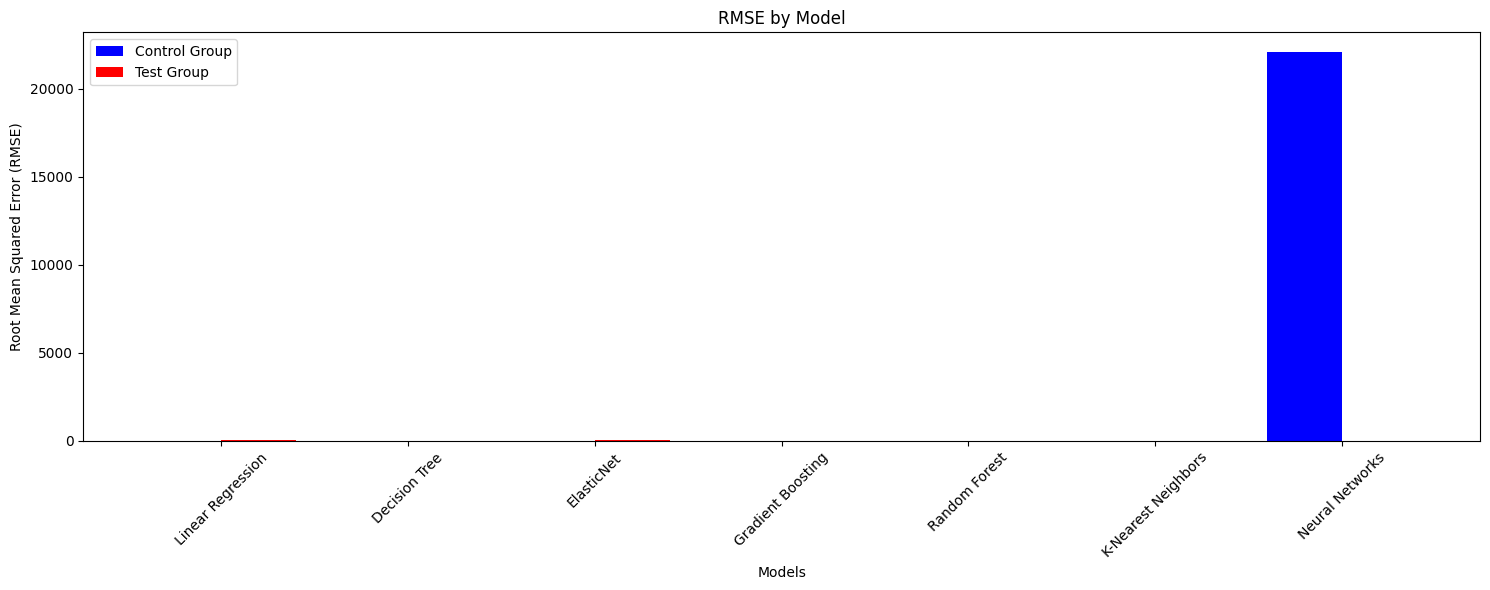

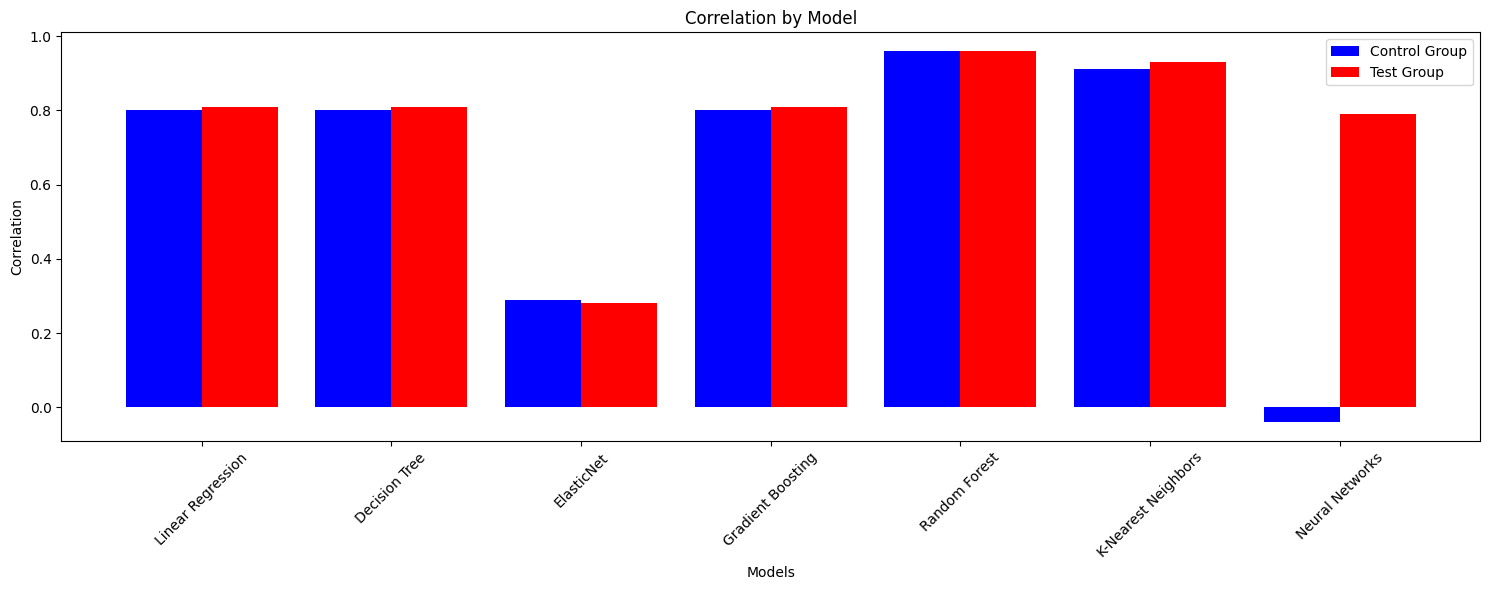

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Define the index for x-axis placement
index = np.arange(len(models))

# Plotting R^2 Score
plt.figure(figsize=(15, 6))
plt.bar(index, r2_control, width=0.4, label='Control Group', color='b', align='center')
plt.bar(index + 0.4, r2_test, width=0.4, label='Test Group', color='r', align='center')
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.title('R^2 Score by Model')
plt.xticks(index + 0.2, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting MSE
plt.figure(figsize=(15, 6))
plt.bar(index, mse_control, width=0.4, label='Control Group', color='b', align='center')
plt.bar(index + 0.4, mse_test, width=0.4, label='Test Group', color='r', align='center')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE by Model')
plt.xticks(index + 0.2, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting MAE
plt.figure(figsize=(15, 6))
plt.bar(index, mae_control, width=0.4, label='Control Group', color='b', align='center')
plt.bar(index + 0.4, mae_test, width=0.4, label='Test Group', color='r', align='center')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE by Model')
plt.xticks(index + 0.2, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting RMSE
plt.figure(figsize=(15, 6))
plt.bar(index, rmse_control, width=0.4, label='Control Group', color='b', align='center')
plt.bar(index + 0.4, rmse_test, width=0.4, label='Test Group', color='r', align='center')
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE by Model')
plt.xticks(index + 0.2, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Correlation Scores
plt.figure(figsize=(15, 6))
plt.bar(index, correlation_control, width=0.4, label='Control Group', color='b', align='center')
plt.bar(index + 0.4, correlation_test, width=0.4, label='Test Group', color='r', align='center')
plt.xlabel('Models')
plt.ylabel('Correlation')
plt.title('Correlation by Model')
plt.xticks(index + 0.2, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


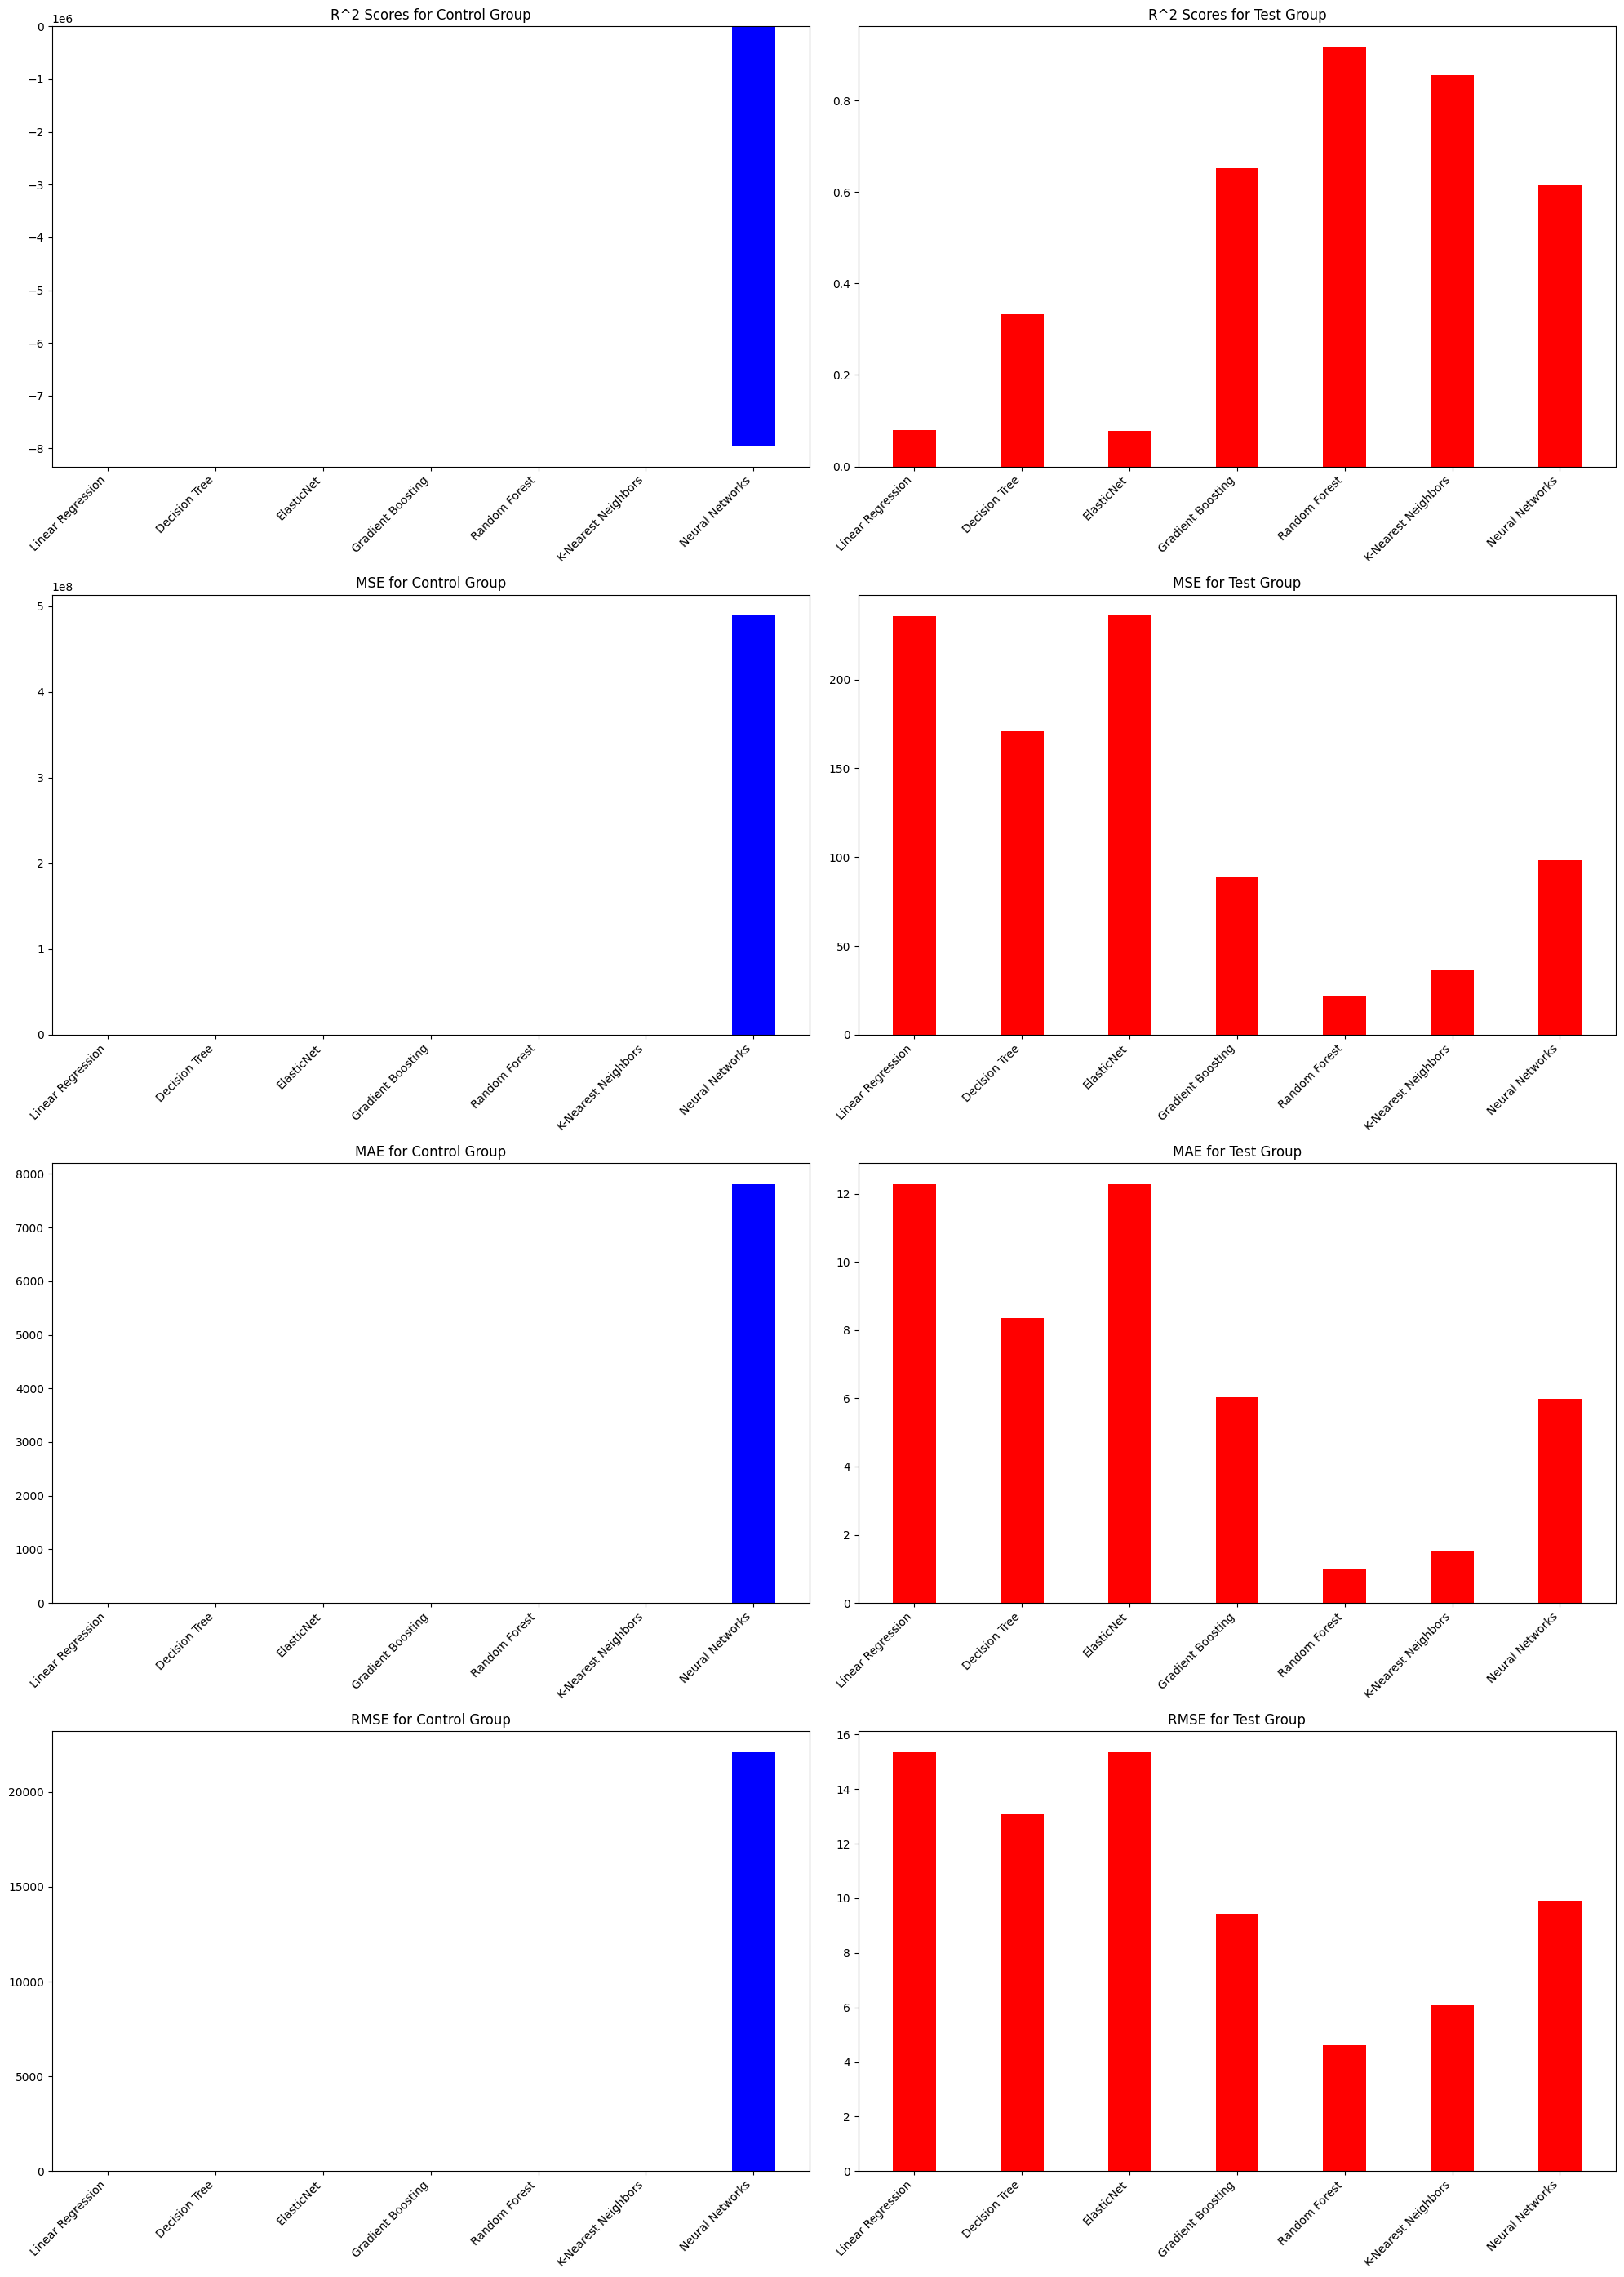

In [7]:
import numpy as np
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Decision Tree', 'ElasticNet', 'Gradient Boosting', 'Random Forest', 'K-Nearest Neighbors', 'Neural Networks']

# Metrics for Control Group
r2_control = [0.0859, 0.3977, 0.0839, 0.6310, 0.9194, 0.8190, -7944405.0750]
mse_control = [56.2487, 37.0648, 56.3727, 22.7064, 4.9613, 11.1396, 488878579.9099]
mae_control = [5.1457, 3.0228, 5.1539, 2.4114, 0.4500, 0.7076, 7816.8776]
rmse_control = [7.4999, 6.0881, 7.5082, 4.7651, 2.2274, 3.3376, 22110.5988]

# Metrics for Test Group
r2_test = [0.0789, 0.3321, 0.0782, 0.6518, 0.9163, 0.8560, 0.6154]
mse_test = [235.7893, 170.9598, 235.9669, 89.1305, 21.4378, 36.8649, 98.4577]
mae_test = [12.2950, 8.3633, 12.2838, 6.0279, 1.0039, 1.5130, 5.9814]
rmse_test = [15.3554, 13.0752, 15.3612, 9.4409, 4.6301, 6.0716, 9.9226]

index = np.arange(len(models))

# Plotting for Control Group
fig, axs = plt.subplots(4, 2, figsize=(20, 28))
axs[0, 0].bar(index, r2_control, color='b', width=0.4)
axs[0, 0].set_title('R^2 Scores for Control Group')
axs[0, 0].set_xticks(index)
axs[0, 0].set_xticklabels(models, rotation=45, ha='right')

axs[1, 0].bar(index, mse_control, color='b', width=0.4)
axs[1, 0].set_title('MSE for Control Group')
axs[1, 0].set_xticks(index)
axs[1, 0].set_xticklabels(models, rotation=45, ha='right')

axs[2, 0].bar(index, mae_control, color='b', width=0.4)
axs[2, 0].set_title('MAE for Control Group')
axs[2, 0].set_xticks(index)
axs[2, 0].set_xticklabels(models, rotation=45, ha='right')

axs[3, 0].bar(index, rmse_control, color='b', width=0.4)
axs[3, 0].set_title('RMSE for Control Group')
axs[3, 0].set_xticks(index)
axs[3, 0].set_xticklabels(models, rotation=45, ha='right')

# Plotting for Test Group
axs[0, 1].bar(index, r2_test, color='r', width=0.4)
axs[0, 1].set_title('R^2 Scores for Test Group')
axs[0, 1].set_xticks(index)
axs[0, 1].set_xticklabels(models, rotation=45, ha='right')

axs[1, 1].bar(index, mse_test, color='r', width=0.4)
axs[1, 1].set_title('MSE for Test Group')
axs[1, 1].set_xticks(index)
axs[1, 1].set_xticklabels(models, rotation=45, ha='right')

axs[2, 1].bar(index, mae_test, color='r', width=0.4)
axs[2, 1].set_title('MAE for Test Group')
axs[2, 1].set_xticks(index)
axs[2, 1].set_xticklabels(models, rotation=45, ha='right')

axs[3, 1].bar(index, rmse_test, color='r', width=0.4)
axs[3, 1].set_title('RMSE for Test Group')
axs[3, 1].set_xticks(index)
axs[3, 1].set_xticklabels(models, rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Conclusion

Our study reveals that gaze dynamics hold promise as indicators of empathy levels. Machine learn-
ing models, notably Random Forest Regressor and Gradient Boosting Regressor, demonstrated
strong predictive capabilities, emphasizing the potential of gaze-related features for empathy as-
sessment. The consistent significance of pupil diameters and gaze event duration across models
and groups highlights their pivotal role. These findings open avenues for advancing empathy
measurement, bridging psychology and technology.
